# 🧠  **Beyond the Symptoms: AI Models for Depression Classification in Mental Health Data** 

**Author:** [Aleksandra Pozorska](https://www.linkedin.com/in/aleksandra-pozorska/)

### 📋 Project Description

This project focuses on predicting the risk of depression using anonymized survey data. The dataset used in this project includes a rich set of features: demographic details (e.g., age, gender, city), academic and occupational factors (e.g., CGPA, work/study hours, satisfaction levels, pressure), lifestyle habits (e.g., sleep patterns, dietary behavior), and psychological indicators (e.g., financial stress, history of suicidal thoughts, family history of mental illness).

By analyzing these multidimensional factors, the project aims to uncover key patterns and build a machine learning model capable of reliably identifying individuals at higher risk of depression, contributing to more proactive mental health support systems.

### 🎯 Objectives  
- Build a robust, reliable and interpretable machine learning pipeline to predict depression risk based on survey responses.
- Explore the impact of lifestyle, academic, and work-related stress on mental health
  
---

### 📊 Dataset Description  

The dataset consists of three files:

- **full_data.csv**: Training data with depression labels  
- **external_data.csv**: Test data (external data without labels)

### 🗂️ Column Descriptions 

- **Name** (`name`) :  Identifier for participants (anonymized)  
- **Gender** (`gender`): Participant's gender identity  
- **Age** (`age`): Participant's age  
- **City** (`city`): Location of residence  
- **Working Professional or Student** (`occupation_status`): Current occupation category  
- **Profession** (`profession`): Specific profession/field of work  
- **Degree** (`degree`): Educational qualification  
- **CGPA** (`cgpa`): Academic performance measure  
- **Academic Pressure** (`academic_pressure`): Level of pressure from academic responsibilities  
- **Work Pressure** (`work_pressure`): Level of pressure from work responsibilities  
- **Study Satisfaction** (`study_satisfaction`): Level of satisfaction with studies  
- **Job Satisfaction** (`job_satisfaction`): Level of satisfaction with current job  
- **Work/Study Hours** (`work_study_hours`): Daily hours spent on work/study  
- **Sleep Duration** (`sleep_duration`): Average daily sleep hours  
- **Dietary Habits** (`dietary_habits`): Eating patterns and food preferences  
- **Have you ever had suicidal thoughts?** (`suicidal_thoughts`): History of suicidal ideation (Yes/No)  
- **Financial Stress** (`financial_stress`): Level of stress related to financial situation  
- **Family History of Mental Illness** (`family_history_mental_illness`): Presence of mental illness in family (Yes/No)  
- **Target Variable: Depression** (`depression`): Binary indicator (1 = Yes, 0 = No) of depression risk  

---

### 🔄 Methodology:
- Load data
- Data preparation & exploration
- Preprocessing 
- Feature selection
- Training and hyperparameter tuning
- Evaluation
- Model selection & prediction
- Deployment
---


# 0. Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Any
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, TargetEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Data preparation & exploration

This section focuses on understanding the dataset and laying the groundwork for effective preprocessing. The following steps are carried out to extract key insights that inform the overall data cleaning strategy:

- Load the dataset and inspect its structure.
- Analyze missing values to assess data completeness.
- Examine the distribution of the target variable.
- Visualize features to uncover patterns and relationships.
  
These steps help ensure the data is well-understood and ready for subsequent modeling tasks.

## 1.1 Load data and inspect structure

In [8]:
# Load the data
train_kaggle_path = '/kaggle/input/playground-series-s4e11/train.csv'
test_kaggle_path = '/kaggle/input/playground-series-s4e11/test.csv'
train_path = 'data/train.csv'
test_path = 'data/test.csv'
columns_names =['id', 'name', 'gender', 'age', 'city', 'occupation_status', 'profession', 
                'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 
                'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts', 'work_study_hours', 
                'financial_stress', 'family_history_mental_illness', 'depression']


In [9]:
df = pd.read_csv(train_path, names=columns_names, header=0)
df.head()

,id,name,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [10]:
external_df = pd.read_csv(test_path, names=columns_names[:-1], header=0) 
external_df.head()

,id,name,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [11]:
# summary of the data
df.info(), external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             140700 non-null  int64  
 1   name                           140700 non-null  object 
 2   gender                         140700 non-null  object 
 3   age                            140700 non-null  float64
 4   city                           140700 non-null  object 
 5   occupation_status              140700 non-null  object 
 6   profession                     104070 non-null  object 
 7   academic_pressure              27897 non-null   float64
 8   work_pressure                  112782 non-null  float64
 9   cgpa                           27898 non-null   float64
 10  study_satisfaction             27897 non-null   float64
 11  job_satisfaction               112790 non-null  float64
 12  sleep_duration                

(None, None)

In [12]:
df.shape, external_df.shape

((140700, 20), (93800, 19))

In [13]:
# Summary statistics for numerical columns
df.describe()

,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,financial_stress,depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


**Conclusions:**
- **Age:**  
  The dataset covers a broad adult age group (range: 18-60 years old) with median at 42.  
- **Academic Pressure/ Work Pressure/ Study Satisfaction/ Job Satisfaction:**  
  Scale 1 to 5, lots of missing values that may impact analyses and should be handled appropriately (imputation).  
- **CGPA:**  
  Likely 10point grading scale (range: 5.03 to 10.00), lots of missing values.   
- **Work/Study Hours:**  
  Relatively high std, showing that people report a wide range of daily work/study hours - from 0 to 12 hours (mostly 6 hours).  
  The presence of 0 values may indicate either non-participation in work/study or possible data entry errors/outliers.  
- **Financial Stress:**  
  Scale 1 to 5, only few missing values.
- **Depression:** 
  Values: 0 (no depression), 1 (depression).  
  18% of respondents are classified as having depression, while the majority do not - class imbalance.  


## 1.2 Missing values analysis

In [16]:
missing_count= df.isnull().sum().sort_values(ascending=False)
missing_count= missing_count[missing_count > 0]
missing_percent = (missing_count/len(df)) * 100

df_missing = pd.DataFrame({'Missing train values: counts': missing_count, "Missing train values: percentage": missing_percent.round(3)})
df_missing

,Missing train values: counts,Missing train values: percentage
study_satisfaction,112803,80.173
academic_pressure,112803,80.173
cgpa,112802,80.172
profession,36630,26.034
work_pressure,27918,19.842
job_satisfaction,27910,19.837
dietary_habits,4,0.003
financial_stress,4,0.003
degree,2,0.001


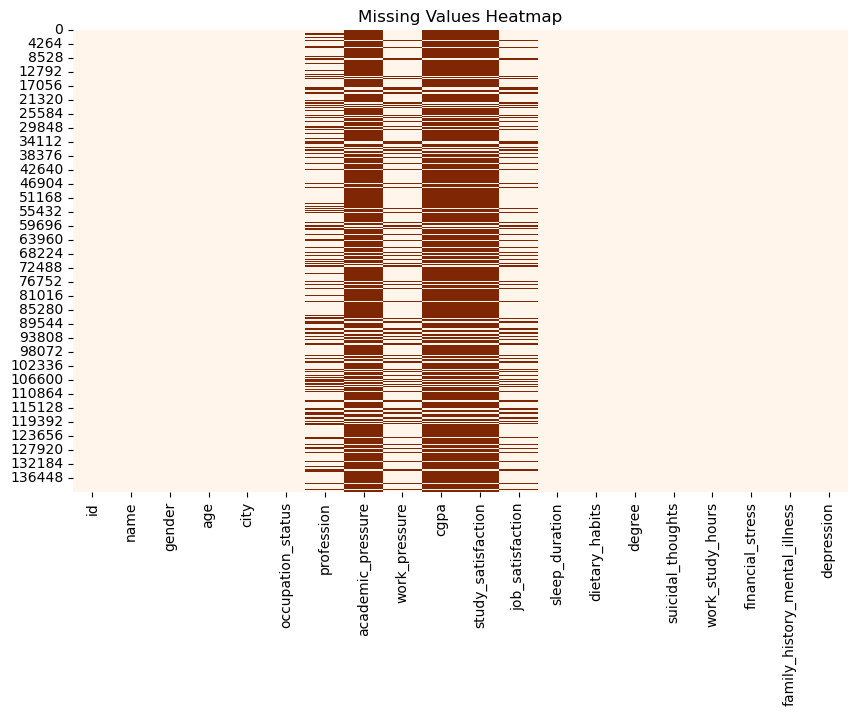

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Oranges")
plt.title("Missing Values Heatmap")
plt.show()

**Heatmap conclusions:** 

**1. Missing Value Patterns**  
 - 9 features contain missing values, with 6 requiring careful handling:  
    - 3 features missing ~80% of data  
    - 3 features missing ~20% of data  
 - Missing values are not randomly distributed. They cluster within the same rows across these features, suggesting that certain respondent groups (e.g., working professionals vs. students) systematically skipped specific questions.
    
**2. Implications for data handling**  
 - **Limit row deletion:** Since missing values are concentrated in specific features and not spread across entire rows, most records remain largely complete. Row-wise deletion would unnecessarily reduce the dataset size.  
 - **Group-Based Imputation:** The clustered pattern implies missingness may correlate with observable subgroups (e.g., working professionals vs. students)

## 1.3 Target variable analysis

In [20]:
np.mean(df.depression)
#imbalance of class , starting point 82% 

0.18171286425017769

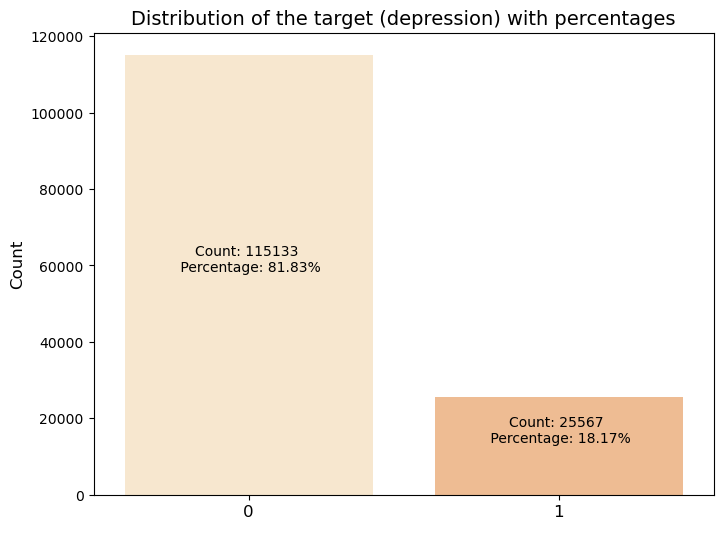

In [21]:
counts = df.depression.value_counts()
percentages = df.depression.value_counts(normalize=True) * 100

custom_palette = {1: "#fdbb84", 0: "#fee8c8"}

plt.figure(figsize=(8, 6))
sns.countplot(x=df.depression, data=df, hue='depression', palette=custom_palette, legend=False)
plt.title('Distribution of the target (depression) with percentages', fontsize=14)
plt.xlabel(' ')
plt.ylabel('Count', fontsize=12)

for i, (count, pct) in enumerate(zip(counts, percentages)):
    plt.text(i, count/2, f'Count: {count} \n Percentage: {pct:.2f}%', ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=range(len(counts)), labels=counts.index, fontsize=12)
plt.show()

**Conclusions:**  

**1. Class Imbalance**
   - ~20% Depressed vs. ~80% Non-Depressed labels
   - Risk of models favoring the majority class without strategic intervention
     
**2. Strategy**  
   - Stratified Sampling: Maintain class proportions in train/validation/test splits (stratify=y) to prevent skewed learning.
   - Metric Prioritization to ensure the model's performance remained fair across both classes:
        - Focus on F1-score (weighted), ROC-AUC score
        - track Recall (minimize false negatives) to better identify depressed individuals
        - De-prioritize accuracy (misleading in imbalanced contexts)

## 1.4  Numerical features analysis

In [24]:
num_features = df.select_dtypes(exclude=['object']).columns.tolist()[1:-1] # without id and depression columns
print(num_features)

['age', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'work_study_hours', 'financial_stress']


### 1.4.1 Histograms of Numerical Features

**Distribution overview:**   
The numerical variables show balanced, diverse distributions with no major anomalies, indicating the data is reliable and ready for further analysis.  

**Variables types:**
- Continuous numerical feature: `age`, `cgpa`
- Ordinal discrete numerical features: `academic_pressure`, `work_pressure`, `study_satisfaction`, `job_satisfaction`, `financial_stress`, `work_study_hours`.

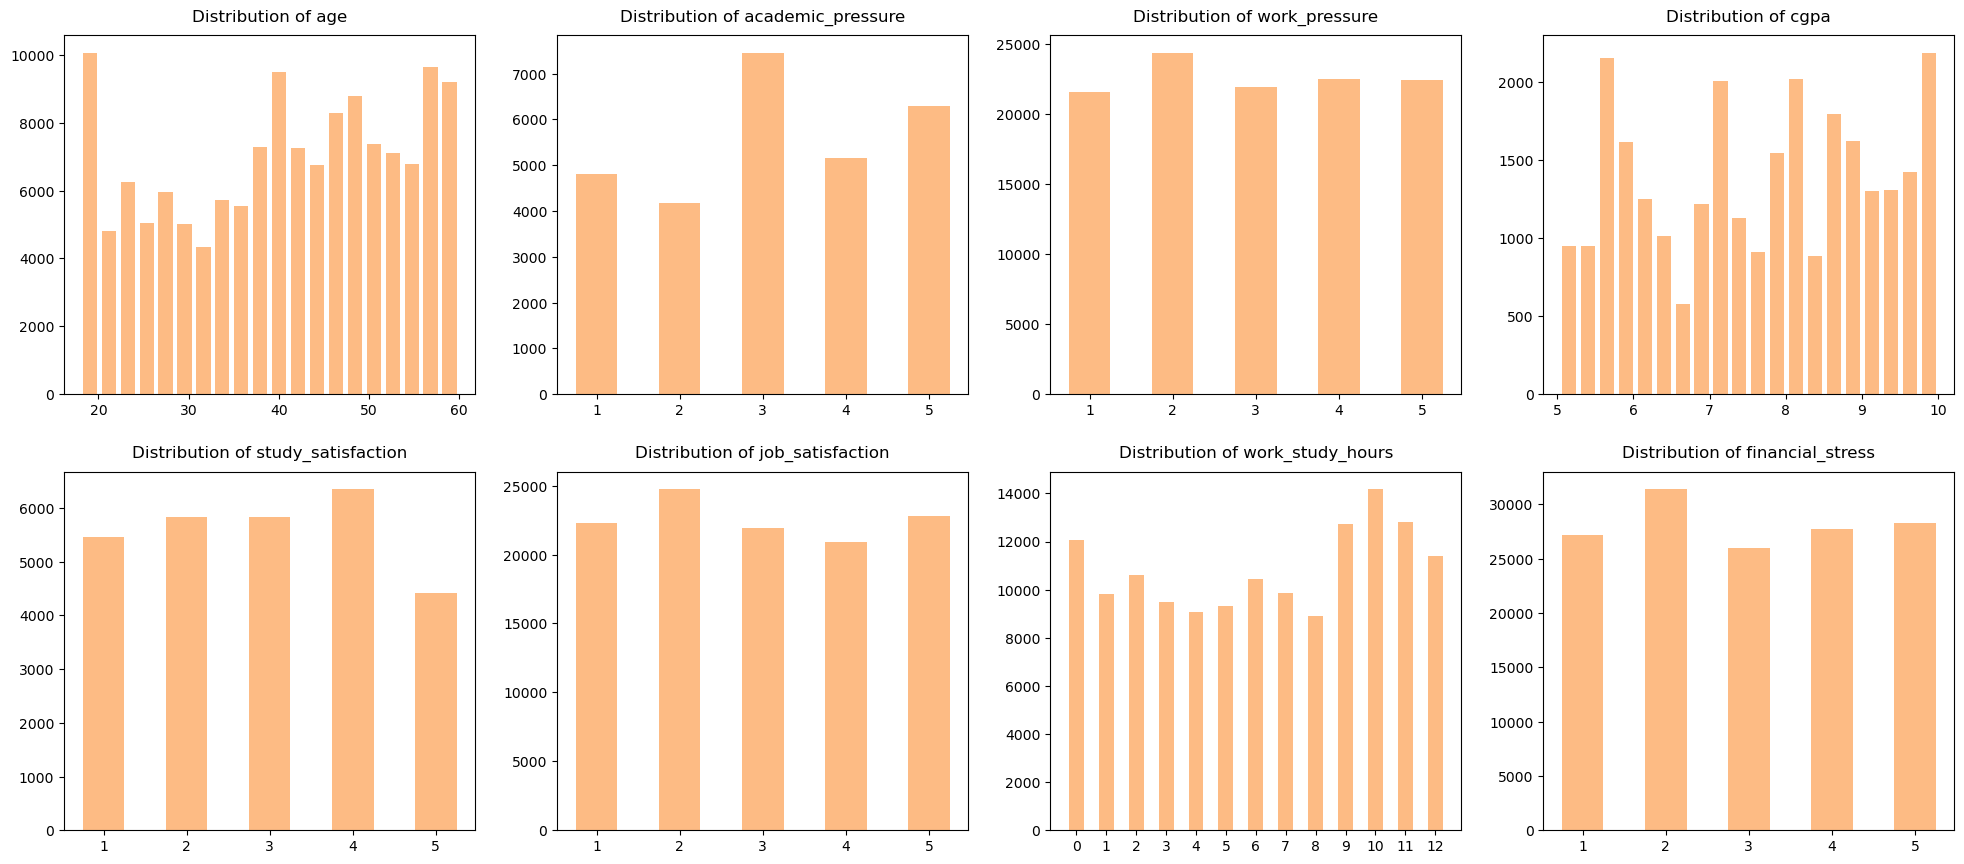

In [26]:
continuous = ['age', 'cgpa']
discrete = [
    'academic_pressure', 'work_pressure', 'study_satisfaction',
    'job_satisfaction', 'work_study_hours', 'financial_stress'
]

fig = plt.figure(figsize=(20, 9))

for idx, feature in enumerate(num_features, 1):
    plt.subplot(2, 4, idx)
    if feature in continuous:
        plt.hist(df[feature], color='#fdbb84', bins=20, rwidth=0.75)
    else:
        vals = df[feature].dropna().unique()
        bins = np.arange(vals.min() - 0.5, vals.max() + 1.5, 1)
        plt.hist(df[feature], bins=bins, color='#fdbb84', rwidth=0.5)
        plt.xticks(np.arange(vals.min(), vals.max() + 1))
    plt.title(f'Distribution of {feature}', pad=10, fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

In [27]:
df.academic_pressure.value_counts(), df.study_satisfaction.value_counts()

(academic_pressure
 3.0    7463
 5.0    6296
 4.0    5158
 1.0    4801
 2.0    4179
 Name: count, dtype: int64,
 study_satisfaction
 4.0    6360
 2.0    5840
 3.0    5823
 1.0    5451
 5.0    4423
 Name: count, dtype: int64)

In [28]:
df.work_pressure.value_counts(), df.job_satisfaction.value_counts()

(work_pressure
 2.0    24373
 4.0    22512
 5.0    22436
 3.0    21899
 1.0    21562
 Name: count, dtype: int64,
 job_satisfaction
 2.0    24783
 5.0    22812
 1.0    22324
 3.0    21951
 4.0    20920
 Name: count, dtype: int64)

In [29]:
df.work_study_hours.value_counts()

work_study_hours
10.0    14199
11.0    12832
9.0     12711
0.0     12066
12.0    11409
2.0     10595
6.0     10432
7.0      9872
1.0      9802
3.0      9474
5.0      9337
4.0      9065
8.0      8906
Name: count, dtype: int64

In [30]:
df.financial_stress.value_counts()

financial_stress
2.0    31451
5.0    28279
4.0    27765
1.0    27211
3.0    25990
Name: count, dtype: int64

In [31]:
df.cgpa.value_counts()

cgpa
8.0400    822
9.9600    425
5.7400    410
8.9500    371
9.2100    343
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 331, dtype: int64

### 1.4.2 Scatter Plots of Mean Depression Rate by Feature Value
These scatter plots illustrate how the average depression rate varies across different values of each numerical feature.  
- `age`, `job_satisfaction`, `work_pressure`  and `financial_stress` show nonlinear associations with depression.  
    PolynomialFeatures can be tested for these variables to determine if they improve model performance.
- `academic_pressure`, `study_satisfaction` and `work_study_hours` show strong linear relationships with depression, and thus do not require transformation.
- `cgpa` does not demonstrate a meaningful association with depression.
  

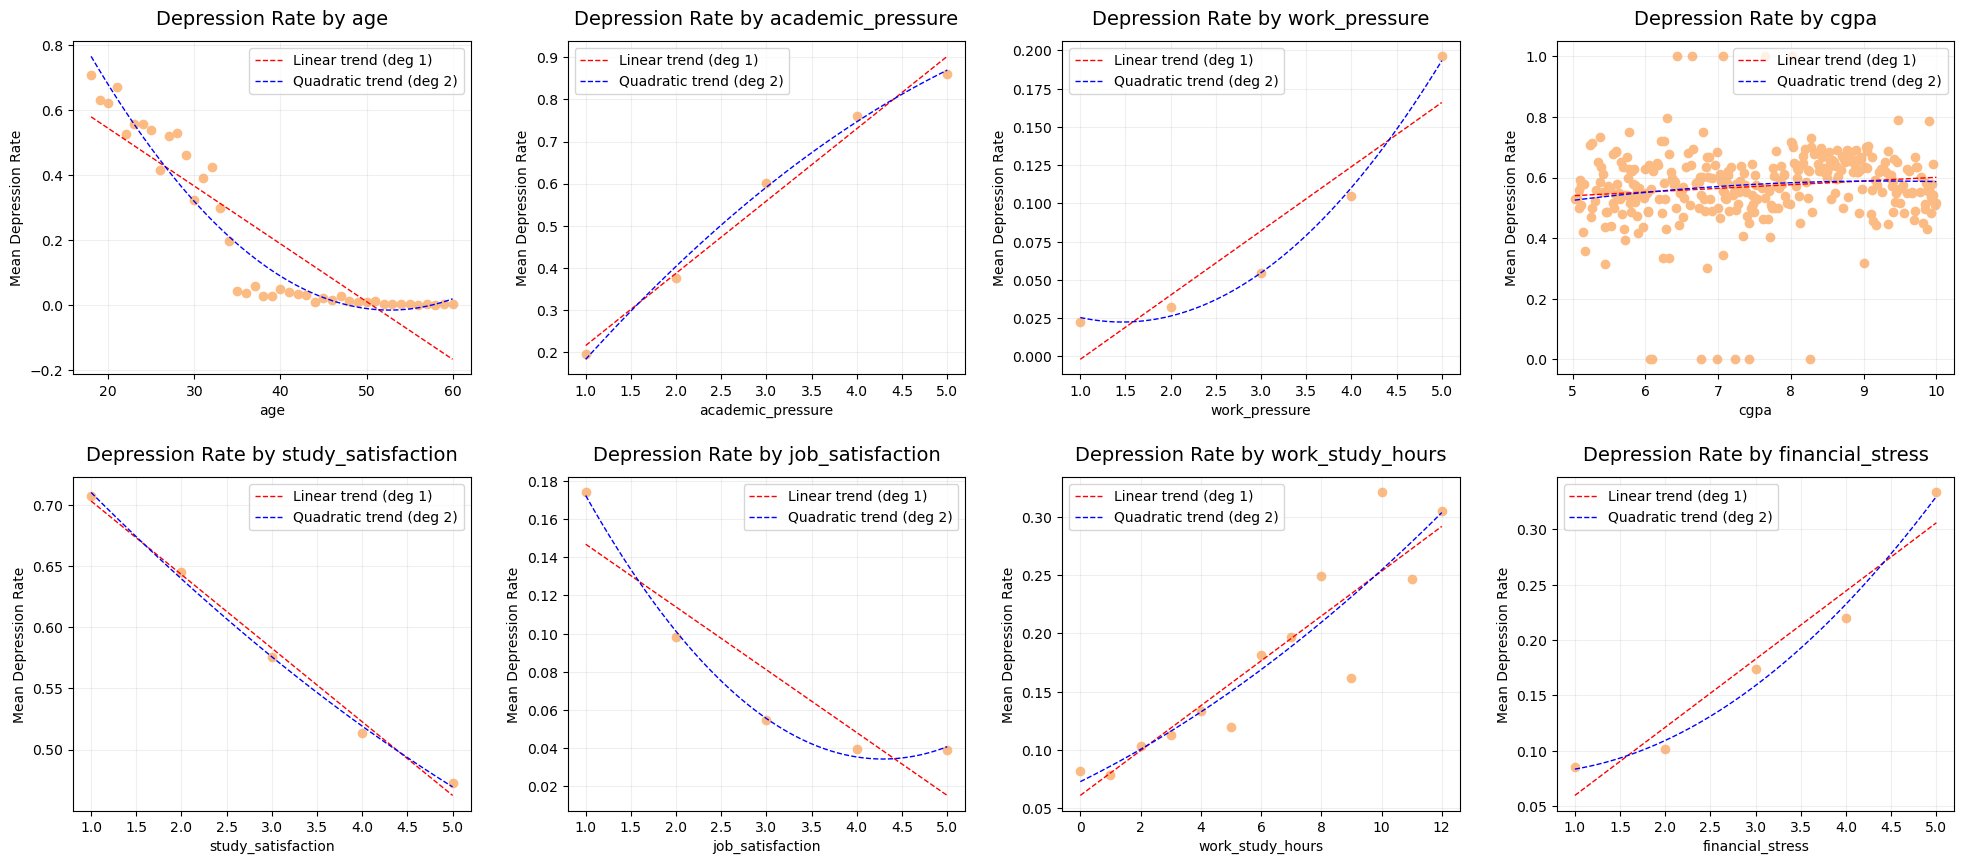

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 9))
axes = axes.flatten()

for idx, feature in enumerate(num_features):
    means = df.groupby(feature)['depression'].mean().reset_index()
    x = means[feature]
    y = means['depression']
    axes[idx].scatter(x, y, color='#fdbb84')
    
    if len(x) > 1:
        z1 = np.polyfit(x, y, 1)
        p1 = np.poly1d(z1)
        x_seq = np.linspace(x.min(), x.max(), 100)
        axes[idx].plot(x_seq, p1(x_seq), "r--", linewidth=1, label='Linear trend (deg 1)')
    
    if len(x) > 2:
        z2 = np.polyfit(x, y, 2)
        p2 = np.poly1d(z2)
        x_seq = np.linspace(x.min(), x.max(), 100)
        axes[idx].plot(x_seq, p2(x_seq), "b--", linewidth=1, label='Quadratic trend (deg 2)')
    
    axes[idx].set_title(f'Depression Rate by {feature}', fontsize=14, pad=12)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Mean Depression Rate', fontsize=10)
    axes[idx].grid(alpha=0.2)
    axes[idx].legend()

plt.tight_layout(pad=2.0)
plt.show()

### 1.4.3 Target Distribution across Numerical Features (boxplots + histograms)

The boxplots illustrate the distribution of various characteristics in relation to the presence or absence of depression.
- Depression is associated with being younger, experiencing higher academic, work, and financial pressure, spending more hours on work/study, and having lower job satisfaction. 
- There is little to no difference in CGPA and study satisfaction between groups.

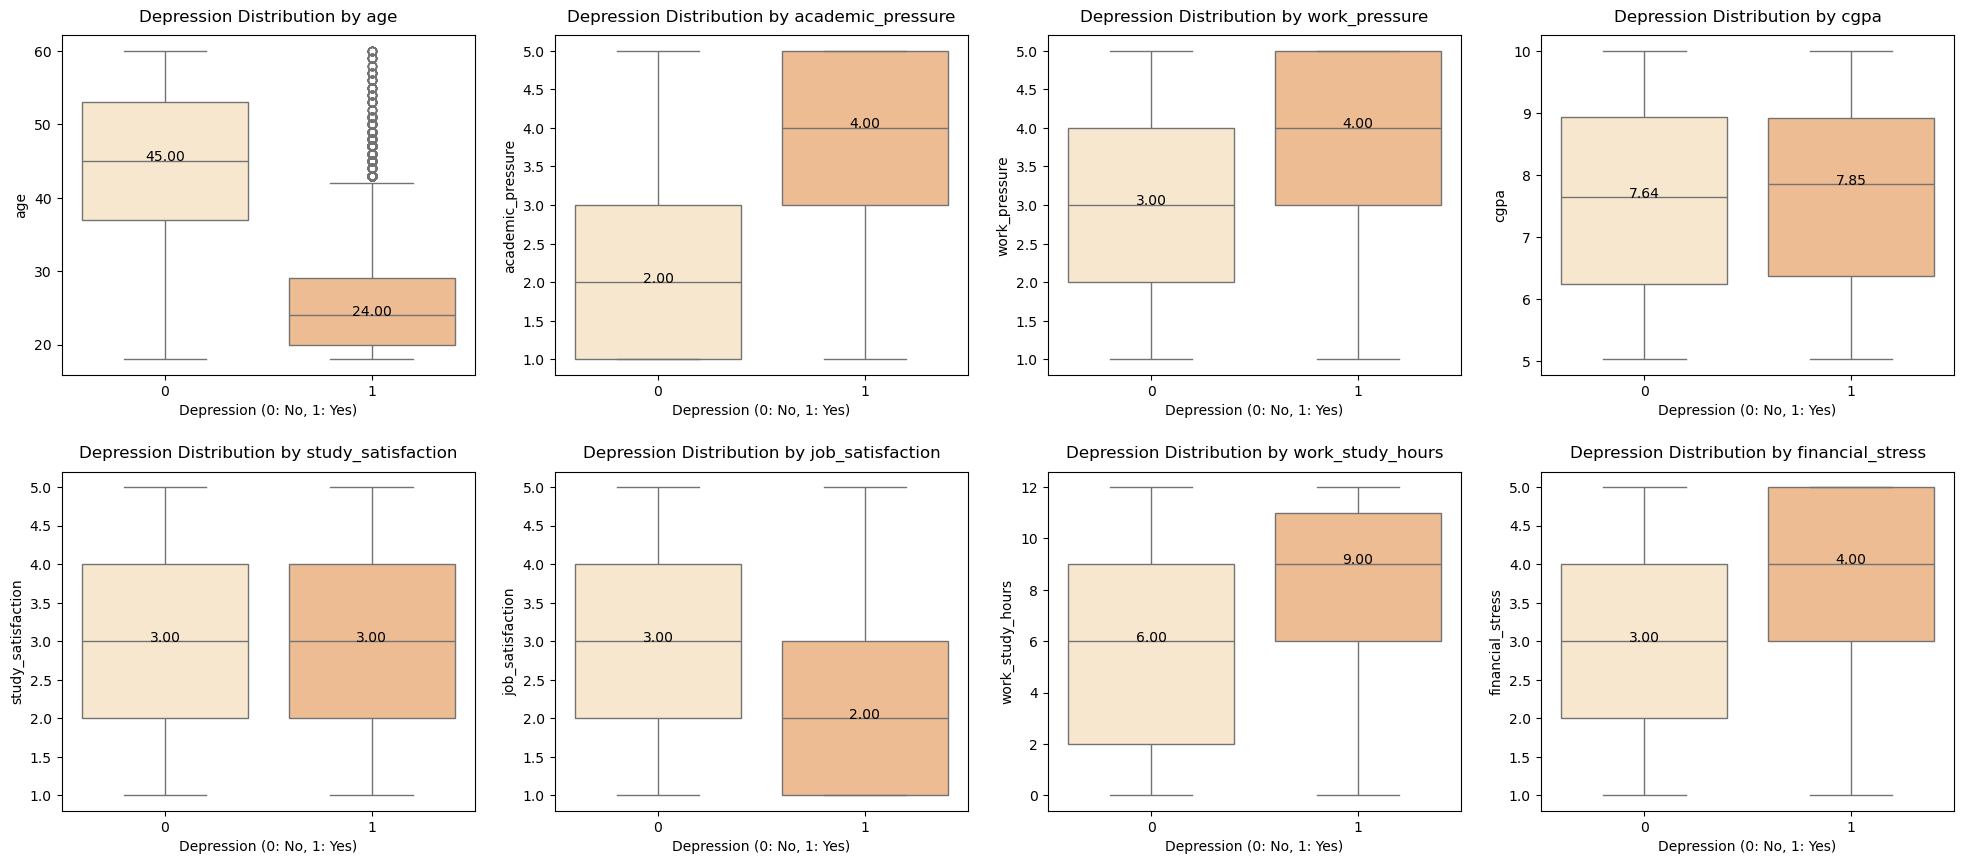

In [35]:
features = num_features
fig = plt.figure(figsize=(20, 9))
for idx, feature in enumerate(features, 1):
    plt.subplot(2,4, idx)
    ax = sns.boxplot(x='depression', y=feature, data=df, hue='depression', palette=custom_palette, legend=False)
    plt.title(f'Depression Distribution by {feature}', pad=10, fontsize=12)
    plt.xlabel('Depression (0: No, 1: Yes)', fontsize=10)
    plt.ylabel(feature)
    medians = df.groupby('depression')[feature].median()
    for i, median in enumerate(medians):
        ax.text(i, median, f'{median:.2f}', horizontalalignment='center', size='medium')
plt.tight_layout(pad=2.0)
plt.show()

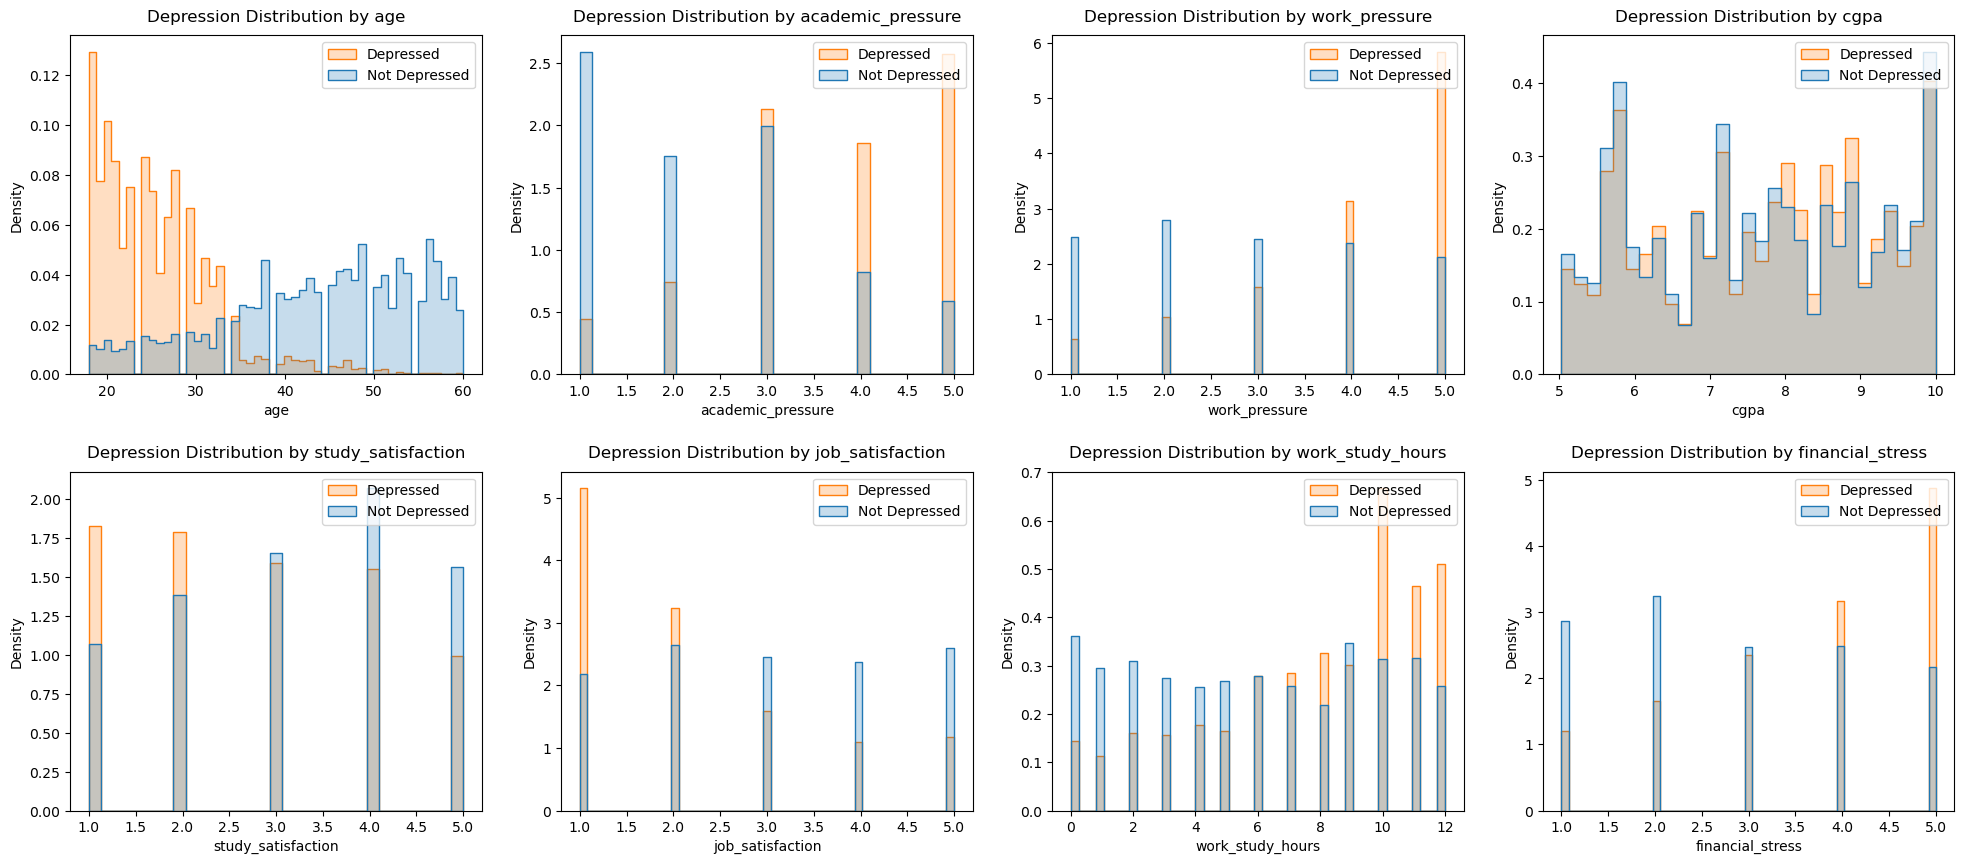

In [36]:
fig = plt.figure(figsize=(20, 9))
features = num_features

for idx, feature in enumerate(features, 1):
    plt.subplot(2, 4, idx)
    sns.histplot(data=df, x=feature, hue='depression', element='step', stat='density', common_norm=False)
    plt.title(f'Depression Distribution by {feature}', pad=10, fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Density')
    plt.legend(labels=['Depressed','Not Depressed'])

plt.tight_layout(pad=2.0)
plt.show()

### 1.4.4 Comparison of Academic/Work Pressures and Satisfaction Levels Across Students and Working Professionals

The crosstab analyses reveal **clear segmentation**. in the reporting of pressure and satisfaction variables by occupation status:
- Students: Only students report on academic pressure and study satisfaction.
- Working Professionals: Only working professionals report on work pressure and job satisfaction.
- Minimal Overlap: There is virtually no overlap; students do not provide data on work/job satisfaction, and professionals do not provide data on academic/study satisfaction.

This segmentation indicates that analyses involving these variables should always account for occupation status, as each set of variables is only relevant to one group. This ensures accurate interpretation and prevents misleading comparisons across groups.

In [38]:
pd.crosstab(df.academic_pressure, df.occupation_status)

occupation_status,Student,Working Professional
academic_pressure,,
1.0,4801,0
2.0,4178,1
3.0,7462,1
4.0,5155,3
5.0,6296,0


In [39]:
pd.crosstab(df.work_pressure, df.occupation_status)

occupation_status,Student,Working Professional
work_pressure,,
1.0,0,21562
2.0,1,24372
3.0,0,21899
4.0,0,22512
5.0,2,22434


In [40]:
pd.crosstab(df.study_satisfaction, df.occupation_status)

occupation_status,Student,Working Professional
study_satisfaction,,
1.0,5451,0
2.0,5838,2
3.0,5821,2
4.0,6359,1
5.0,4422,1


In [41]:
pd.crosstab(df.job_satisfaction, df.occupation_status)

occupation_status,Student,Working Professional
job_satisfaction,,
1.0,2,22322
2.0,3,24780
3.0,1,21950
4.0,2,20918
5.0,0,22812


### 1.4.5 Correlation matrix

**Correlations with target (Depression)**
 - Strong correlations: `age`, `academic pressure` show the strongest associations with depression, making them the most valuable predictors.
 - Moderate correlations: `financial stress`, `work pressure`, `work/study hours`, `job satisfaction`, `study satisfaction`.
 - Weak or No Correlation: `CGPA` - does not have a meaningful relationship with depression. There is no visible linear relationship between CGPA and depression. Therefore, clustering might reveal more general patterns.
   
**Correlations between features**
 - `age` is negatively correlated with `work_study_hours`, `work_pressure`, `academic_pressure`, and `financial_stress`, suggesting that younger individuals tend to experience higher levels of pressure and stress.
 - `job_satisfaction` and `academic_pressure`/`study_satisfaction` show perfect negative correlations (-1.00), and `job_satisfaction` and `cgpa` show a perfect positive correlation (1.00).  
     These perfect correlations are highly unusual and may indicate data redundancy or a coding issue — such relationships rarely occur in real-world data.

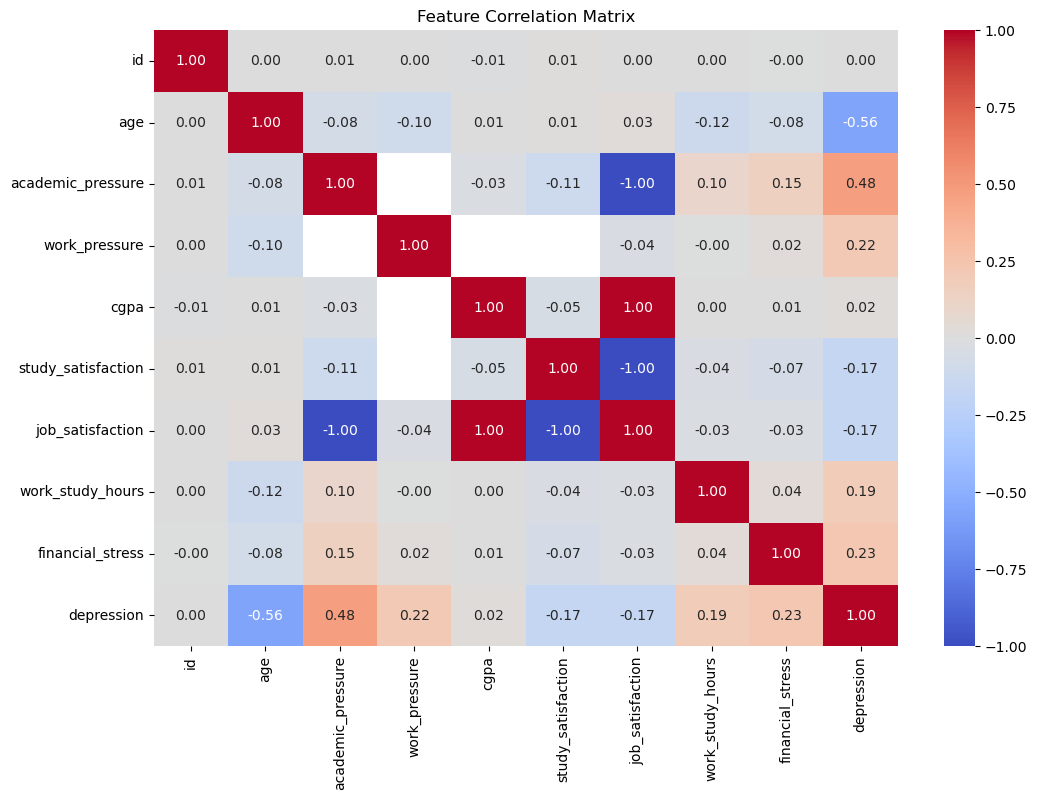

In [43]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## 1.5 Categorical features analysis


In [45]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
print(cat_features)

['name', 'gender', 'city', 'occupation_status', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts', 'family_history_mental_illness']


### 1.5.1 Unique values and Overall Distribution of categorical features

The dataset contains a mix of high, moderate, and low cardinality categorical features. 

**High Cardinality Features:**

- `name` - has the highest number of unique values (422), should be dropped because it is an identifier and does not contain information that could help predict depression. 
- `degree`, `city`, and `profession` - have a high number of unique values. Many of these categories are represented by only a small number of observations or have inconsistent formatting (degree).
- These features require special handling (e.g., grouping, encoding) to avoid overfitting or excessive model complexity and to improve model performance.

**Moderate Cardinality Features:**  
 - `sleep_duration` and `dietary_habits` have several distinct categories, with a few dominant ones and some rare or unexpected entries, suggesting possible data entry errors.

**Low Cardinality/Binary Features:**

- `gender`, `suicidal_thoughts`, and `family_history_mental_illness` show relatively balanced distributions across their categories.
- `occupation_status` is skewed toward "Working Professionals" (112,799 vs. 27,901 Students).
- These features are straightforward to include in machine learning models.


The dataset’s categorical features require careful preprocessing, including cleaning, fixing inconsistencies, and grouping rare categories. Strategic encoding will also be important for effective modeling.

In [47]:
unique_counts = df[cat_features].nunique().reset_index()
unique_counts.columns = ['Feature', 'Unique Values Count']
unique_counts = unique_counts.sort_values(by='Unique Values Count', ascending=False)
unique_counts

,Feature,Unique Values Count
0,name,422
7,degree,115
2,city,98
4,profession,64
5,sleep_duration,36
6,dietary_habits,23
1,gender,2
3,occupation_status,2
8,suicidal_thoughts,2
9,family_history_mental_illness,2


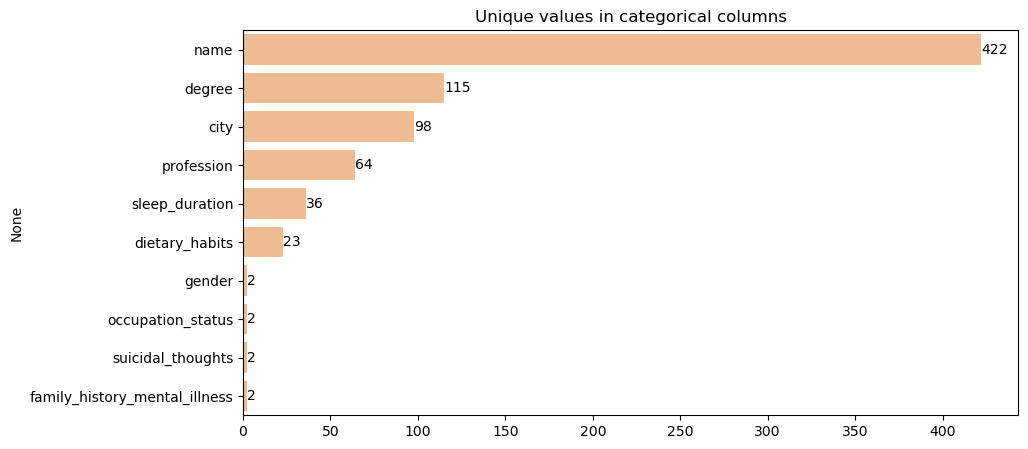

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(
    x=df[cat_features].nunique().sort_values(ascending=False).values,
    y=df[cat_features].nunique().sort_values(ascending=False).index,
    ax=ax,
    color='#fdbb84'
)
ax.set_title('Unique values in categorical columns')

for i, value in enumerate(df[cat_features].nunique().sort_values(ascending=False).values):
    ax.text(value, i, f'{value}', va='center')

plt.show()

In [49]:
df.gender.value_counts(), df.occupation_status.value_counts(), df.suicidal_thoughts.value_counts(), df.family_history_mental_illness.value_counts()

(gender
 Male      77464
 Female    63236
 Name: count, dtype: int64,
 occupation_status
 Working Professional    112799
 Student                  27901
 Name: count, dtype: int64,
 suicidal_thoughts
 No     71138
 Yes    69562
 Name: count, dtype: int64,
 family_history_mental_illness
 No     70758
 Yes    69942
 Name: count, dtype: int64)

In [50]:
df.name.value_counts().head(30),df.degree.value_counts().head(30), df.city.value_counts().head(30), df.profession.value_counts().head(30), df.sleep_duration.value_counts().head(5), df.dietary_habits.value_counts().head(5)

(name
 Rohan          3178
 Aarav          2336
 Rupak          2176
 Aaradhya       2045
 Anvi           2035
 Raghavendra    1877
 Vani           1657
 Tushar         1596
 Ritvik         1589
 Shiv           1568
 Riya           1548
 Rashi          1547
 Raunak         1524
 Anand          1486
 Ishaani        1477
 Ansh           1423
 Vidya          1408
 Ritika         1313
 Anushka        1279
 Sanya          1272
 Aarush         1266
 Aariv          1254
 Abhishek       1252
 Rupal          1234
 Harsha         1230
 Harsh          1156
 Vikram         1154
 Shivam         1146
 Raghav         1120
 Armaan         1116
 Name: count, dtype: int64,
 degree
 Class 12          14729
 B.Ed              11691
 B.Arch             8742
 B.Com              8113
 B.Pharm            5856
 BCA                5739
 M.Ed               5668
 MCA                5234
 BBA                5030
 BSc                5027
 MSc                4879
 LLM                4647
 M.Pharm            4537
 M.

In [51]:
df.degree.value_counts().head(60)

degree
Class 12          14729
B.Ed              11691
B.Arch             8742
B.Com              8113
B.Pharm            5856
BCA                5739
M.Ed               5668
MCA                5234
BBA                5030
BSc                5027
MSc                4879
LLM                4647
M.Pharm            4537
M.Tech             4475
B.Tech             4425
LLB                4348
BHM                4305
MBA                3818
BA                 3750
ME                 3632
MD                 3383
MHM                3286
BE                 3104
PhD                3103
M.Com              3094
MBBS               3082
MA                 2887
M.Arch                5
UX/UI Designer        4
B.Sc                  3
Kalyan                3
M                     3
BArch                 2
MEd                   2
BPharm                2
P.Com                 2
Jhanvi                2
LLBA                  2
Degree                2
B                     2
Bhopal                2
BEd      

### 1.5.2 Target Distribution Across Catgorical Features (Histograms)

The histograms display how depression status is distributed across various categorical features in the dataset.
- Most categorical features show a higher count of "Not Depressed" individuals, reflecting the overall class imbalance in the dataset, where the majority of cases are not classified as depressed.
- The strongest categorical predictors of depression in this dataset are suicidal thoughts, occupation_status, and sleep_duration.
- Family history of mental illness and dietary habits also show meaningful associations with depression status.
- High-cardinality features (name, profession, city, degree) do not show strong patterns at the category level but may still contain useful information after grouping or encoding.
- Feature such as gender do not show a strong association with depression.


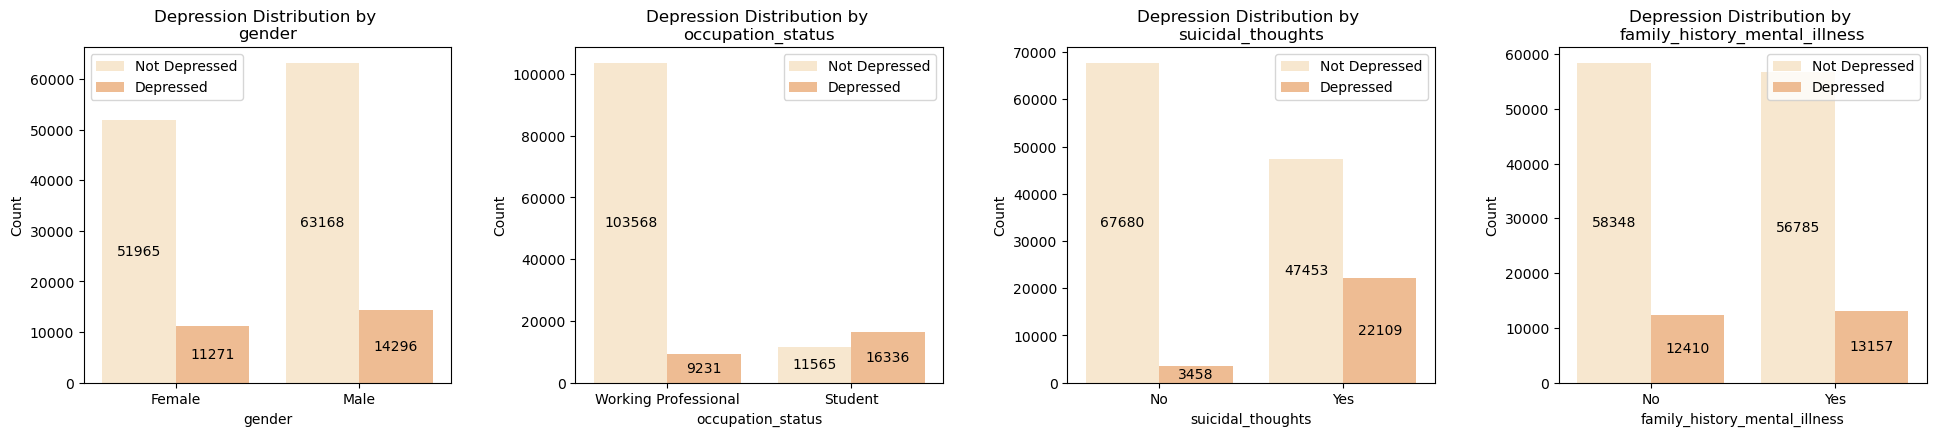

In [53]:
custom_palette = {1: "#fdbb84", 0: "#fee8c8"}

plt.figure(figsize=(20, 5))
features = ['gender', 'occupation_status', 'suicidal_thoughts', 'family_history_mental_illness']
for idx, feature in enumerate(features, 1):
    plt.subplot(1, 4, idx)
    ax = sns.countplot(x=feature, hue='depression', data=df, palette=custom_palette)
    plt.title(f'Depression Distribution by \n{feature}')
    plt.ylabel('Count')
    plt.legend(labels=['Not Depressed', 'Depressed'])
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='center', fontsize=10)

plt.tight_layout(pad=3.0)
plt.show()

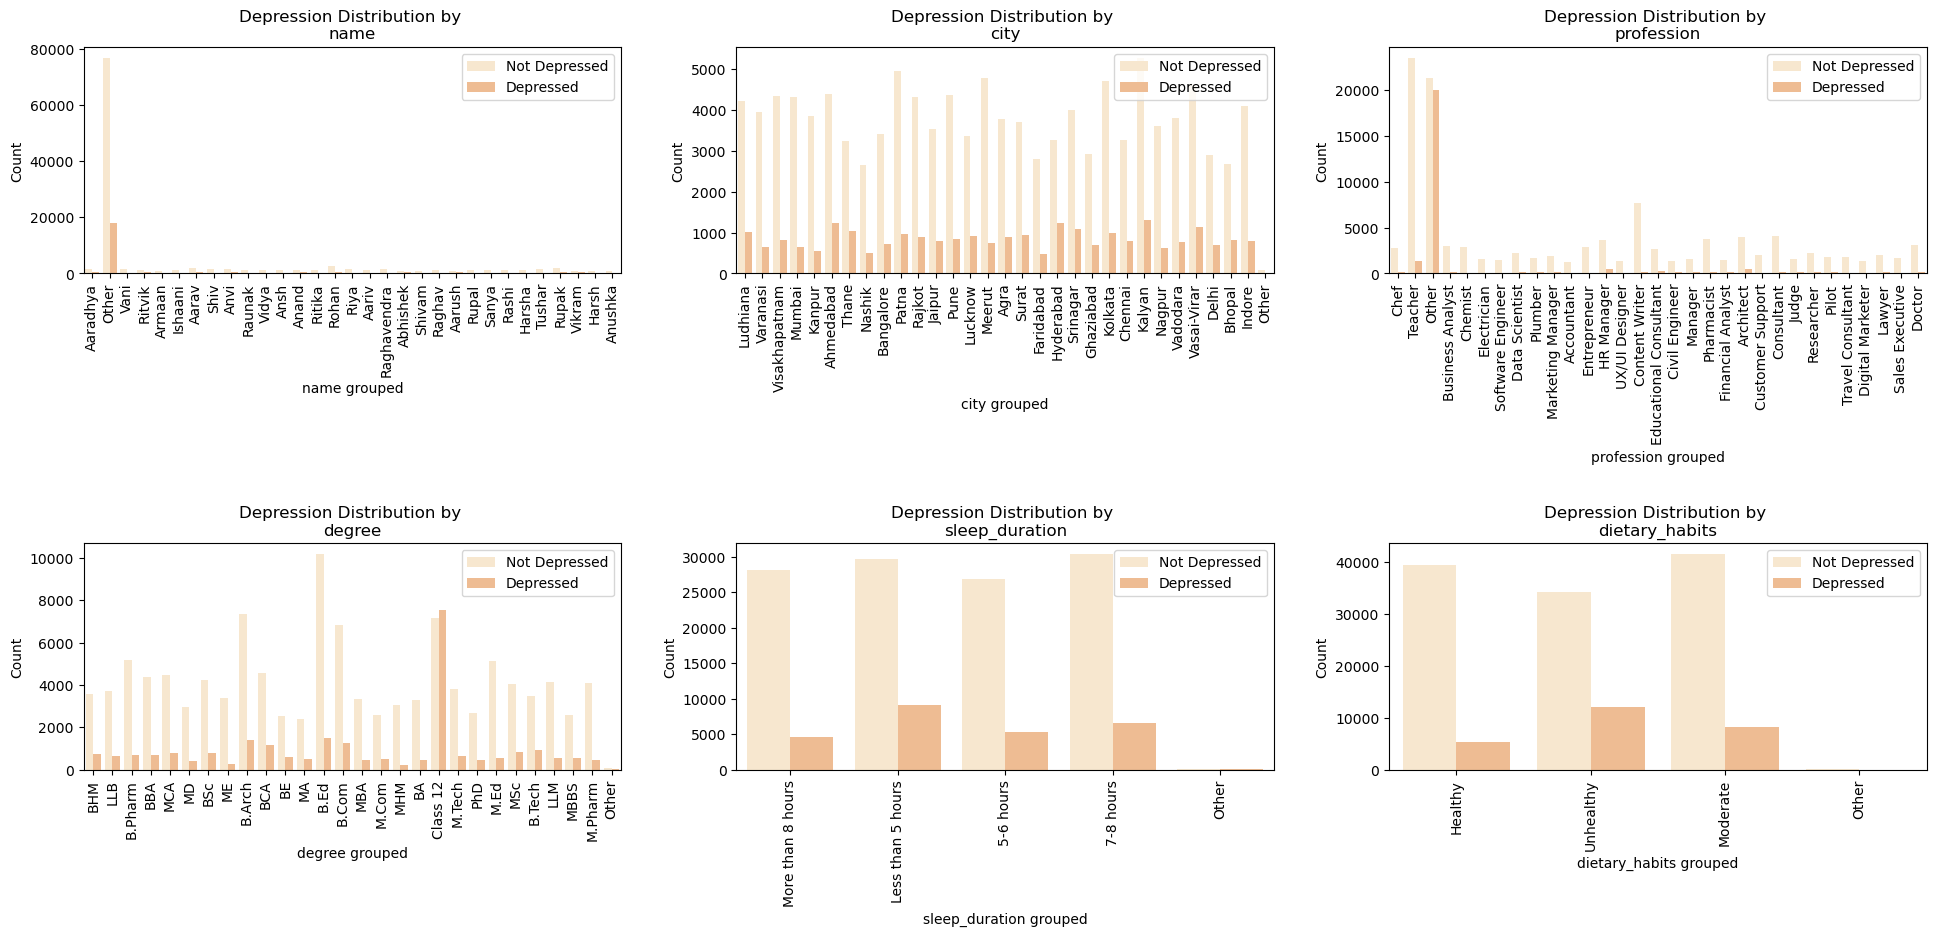

In [54]:
plt.figure(figsize=(20, 10))
df_grouped = df.copy()

def plot_depression_distribution(df, feature, top_n):
    top_categories = df_grouped[feature].value_counts().nlargest(top_n).index
    df_grouped[f'{feature} grouped'] = df_grouped[feature].where(df_grouped[feature].isin(top_categories), other='Other')
    sns.countplot(x=f'{feature} grouped', hue='depression', data=df_grouped, palette=custom_palette)
    plt.title(f'Depression Distribution by \n{feature}')
    plt.ylabel('Count')
    plt.legend(labels=['Not Depressed', 'Depressed'])
    plt.xticks(rotation=90)

plt.subplot(2, 3, 1)
plot_depression_distribution(df_grouped, 'name', 30)

plt.subplot(2, 3, 2)
plot_depression_distribution(df_grouped, 'city', 30) 

plt.subplot(2, 3, 3)
plot_depression_distribution(df_grouped, 'profession', 30)

plt.subplot(2, 3, 4)
plot_depression_distribution(df_grouped, 'degree', 27)

plt.subplot(2, 3, 5)
plot_depression_distribution(df_grouped, 'sleep_duration', 4)

plt.subplot(2, 3, 6)
plot_depression_distribution(df_grouped, 'dietary_habits', 3)

plt.tight_layout(pad=3.0)
plt.show()

# 2. Preprocessing

- **Data checks:** Remove unnecessary columns and handle duplicates to ensure data integrity.
- **Flagging:** Add flags for inconsistent data and for cases requiring conditional imputation, to track data quality and preprocessing steps.
- **Handling high-cardinality categorical variables:** Transform high-cardinality categorical featurg) to reduce dimensionality and prevent overfitting.
- **Rare category combiner:** Combine rare categories in categorical variables into an "Other" or similar groupand improve model robustness.
- **Imputation:** Impute missing values for both numerical and categorical features using appropriate methods (custom or standard), depending on the nature and pattern of missingness.
- **Feature engineering:** Create new features by combining existing ones where it adds value for the analysis or model.
- **Encoding:** Encode categorical variables (e.g., one-hot, ordinal, or target encoding) to prepare them for modeling.
- **Scaling:** Scale numerical fation).malization).

## 2.1 Data checks

### 2.1.1 Checking duplicates 

In [58]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,id,name,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression


**Conclusions:** There are no duplicates.

### 2.1.2 Removing unnecessary columns
Name, id do not contribute meaningfully to predicting depression - they are dropped. 

In [61]:
# Removing unnecessary columns: Name, id
df = df.drop(["name", "id"], axis=1)
df.head()

,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## 2.2 Splitting the data

To ensure robust model development and unbiased evaluation, the dataset is divided into three subsets:

- **Training set**: Used for fitting models and tuning hyperparameters.  
- **Validation set**: Used for optimizing the classification threshold and selecting the best model based on evaluation metrics.  
- **Test set**: Reserved for final evaluation to estimate model performance on completely unseen data.

In [63]:
X = df.drop(["depression"], axis=1)
y = df.depression

In [64]:
y.value_counts()
# Reminder from analysis above - data is imbalanced - stratify=y while splitting the data to preserve class balance 

depression
0    115133
1     25567
Name: count, dtype: int64

In [65]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.1, random_state=42, stratify=y_full_train)

In [67]:
print(f"Class distribution in training set: {y_train.value_counts()} \nClass distribution in validation set: {y_val.value_counts()}\nClass distribution in test set: {y_test.value_counts()}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape} \nX_val shape: {X_val.shape}, y_val shape: {y_val.shape} \nX_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Class distribution in training set: depression
0    93258
1    20709
Name: count, dtype: int64 
Class distribution in validation set: depression
0    10362
1     2301
Name: count, dtype: int64
Class distribution in test set: depression
0    11513
1     2557
Name: count, dtype: int64
X_train shape: (113967, 17), y_train shape: (113967,) 
X_val shape: (12663, 17), y_val shape: (12663,) 
X_test shape: (14070, 17), y_test shape: (14070,)


## 2.3 Custom preprocessing | Business Logic and Data Cleaning Custom Transformations 
In the first step of the pipeline, all business logic-driven and data cleaning transformations are performed sequentially using modular custom transformers, each responsible for a specific task. 

### 2.3.1 Logical flagging 
- Add flags for inconsistency of the data
- Add flags for cases requiring conditional imputation


Very small number of entries (37 out of 140,700) showed inconsistencies, such as mismatches between occupation status and profession, or simultaneous reporting of both work-related and academic pressures or satisfactions. These cases likely result from data entry errors or represent individuals who both study and work. Given their extremely low frequency, they do not significantly impact the overall analysis. For transparency, these entries were reviewed and flagged - additional column inconsistency_flag.

In [70]:
class InconsistencyFlagger(BaseEstimator, TransformerMixin):
    """
    Adds an 'inconsistency_flag' column to the DataFrame, marking rows with logical inconsistencies
    based on pressure, satisfaction, and occupation/profession fields.
    """
    def __init__(self):
        pass

    def fit(self, X: pd.DataFrame, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        X['inconsistency_flag'] = (
            ((X['work_pressure'] > 0) & (X['academic_pressure'] > 0)).astype(int) +
            ((X['study_satisfaction'] > 0) & (X['job_satisfaction'] > 0)).astype(int) +
            (
                ((X['occupation_status'] == 'Working Professional') & (X['profession'] == 'Student')) |
                ((X['occupation_status'] == 'Student') & (X['profession'] != 'Student') & (X['profession'].notna()))
            ).astype(int)
        )
        return X


class ConditionalFlagger(BaseEstimator, TransformerMixin):
    """
    Adds binary flag columns for missing values in specified columns, using user-defined conditional rules.
    Flags are set as 'not applicable' or 'imputed' depending on another column's value, as defined in the flagging_map dictionary.
    """
    def __init__(self, flagging_map, suffix_map=None):
        self.flagging_map = flagging_map
        self.suffix_map = suffix_map or {'not_applicable': '_not_applicable', 'imputed': '_imputed'}

    def fit(self, X: pd.DataFrame, y=None):
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        for col, conditions in self.flagging_map.items():
            for flag_type, cond in conditions.items():
                cond_col, cond_val = list(cond.items())[0]
                mask = (X[cond_col] == cond_val) & (X[col].isna())
                flag_col = f"{col}{self.suffix_map[flag_type]}"
                X[flag_col] = 0
                X.loc[mask, flag_col] = 1
        return X

In [71]:
X_train_flagged = X_train.copy()
X_test_flagged = X_test.copy()

In [72]:
inconsistency_flagger = InconsistencyFlagger()
inconsistency_flagger.fit(X_train_flagged)
X_train_flagged = inconsistency_flagger.transform(X_train_flagged)
X_test_flagged = inconsistency_flagger.transform(X_test_flagged)
X_train_flagged[X_train_flagged.inconsistency_flag != 0]

,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,inconsistency_flag
11470,Female,28.0,Ahmedabad,Student,Digital Marketer,5.0,NaN,9.72,3.0,NaN,More than 8 hours,Healthy,MA,Yes,10.0,5.0,Yes,1
104123,Male,28.0,Ludhiana,Student,Digital Marketer,1.0,NaN,9.41,5.0,NaN,5-6 hours,Healthy,BA,Yes,5.0,3.0,Yes,1
61219,Female,23.0,Kalyan,Student,Chef,3.0,NaN,9.91,4.0,NaN,7-8 hours,Healthy,BHM,Yes,10.0,3.0,No,1
16959,Female,24.0,Mumbai,Student,Architect,3.0,NaN,8.89,5.0,NaN,More than 8 hours,Unhealthy,MSc,Yes,3.0,5.0,Yes,1
43035,Male,23.0,Patna,Student,Manager,3.0,NaN,8.62,2.0,NaN,More than 8 hours,Healthy,BHM,No,9.0,5.0,No,1
88617,Male,29.0,Srinagar,Working Professional,Student,NaN,4.0,NaN,NaN,2.0,5-6 hours,Moderate,BE,No,10.0,1.0,Yes,1
1428,Male,29.0,Srinagar,Student,NaN,3.0,NaN,9.63,3.0,3.0,7-8 hours,Moderate,M.Pharm,No,8.0,5.0,No,1
19226,Male,31.0,Rajkot,Student,Teacher,3.0,NaN,7.48,5.0,NaN,5-6 hours,Unhealthy,MD,Yes,12.0,2.0,Yes,1
73447,Male,35.0,Ahmedabad,Working Professional,Student,NaN,4.0,NaN,NaN,2.0,Less than 5 hours,Moderate,BSc,No,1.0,3.0,Yes,1
78083,Male,32.0,Meerut,Student,Doctor,5.0,NaN,9.70,3.0,NaN,Less than 5 hours,Healthy,M.Pharm,Yes,3.0,4.0,No,1


In [73]:
flagging_map = {
    'work_pressure': {
        'not_applicable': {'occupation_status': 'Student'},
        'imputed': {'occupation_status': 'Working Professional'}
    },
    'job_satisfaction': {
        'not_applicable': {'occupation_status': 'Student'},
        'imputed': {'occupation_status': 'Working Professional'}
    },
    'academic_pressure': {
        'not_applicable': {'occupation_status': 'Working Professional'},
        'imputed': {'occupation_status': 'Student'}
    },
    'study_satisfaction': {
        'not_applicable': {'occupation_status': 'Working Professional'},
        'imputed': {'occupation_status': 'Student'}
    },
    'cgpa': {
        'not_applicable': {'occupation_status': 'Working Professional'},
        'imputed': {'occupation_status': 'Student'}
    }
}

In [74]:
conditional_flagger = ConditionalFlagger(flagging_map)
conditional_flagger.fit(X_train_flagged)
X_train_flagged = conditional_flagger.transform(X_train_flagged)
X_test_flagged = conditional_flagger.transform(X_test_flagged)

In [75]:
pipeline = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
])

pipeline.fit(X_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                                       'not_applicable': {'occupation_status': 'Student'}},
                                                  'study_satisfaction': {'imputed': {'occupation_status': 'Student'},
                                                                         'not_applicable': {'occupation_status': 'Working '
                                                                                                                 'Professional'}},
                                                  'work_pressure': {'imputed': {'occupation_status': 'Working '
                                                                                                     'Professional'},
                                                                    'not_applicable': {'occupation_status': 'Student'}}},
                                    suffix_map={'imputed': '_imputed',
                                                'not_applicable': '_not_applicable'}))])

### 2.3.2 Role-Based Custom Imputation for Categorical Variables
 For the `profession` column missing values are imputed logically based on `occupation_status`.
 The value "Student" is assigned to the `profession` column for all individuals whose `occupation_status` is "Student" and who had missing entries in `profession`. 


In [77]:
class RelationalImputer(BaseEstimator, TransformerMixin):
    """
    Conditionally imputes missing values in specified columns based on another column's value.
    Args:
        cols_to_impute (list of str): Columns to impute missing values in.
        condition_col (str): Column used to define the imputation condition.
        condition_value (str): Value in `condition_col` that triggers imputation
        strategy (str, default='constant'): Imputation strategy ('constant', 'median', or 'most_frequent').
        fill_value (any, optional): Value to use for 'constant' strategy.
    Raises:
        ValueError: If strategy is invalid or required columns are missing.
    """

    def __init__(self,
                 cols_to_impute: list["str"],
                 condition_col: str,
                 condition_value: str,
                 strategy: str = 'constant',
                 fill_value: Any = None
                 ):
        self.cols_to_impute = cols_to_impute
        self.condition_col = condition_col
        self.condition_value = condition_value
        self.strategy = strategy
        self.fill_value = fill_value
        self.medians_ = {}
        self.modes_ = {}
        if strategy not in ['constant', 'median', 'most_frequent']:
            raise ValueError("Unknown strategy. Choose: 'constant', 'median' or 'most_frequent'")
        if strategy == 'constant' and fill_value is None:
            raise ValueError("fill_value must be set for 'constant' strategy.")

    def fit(self, X: pd.DataFrame, y=None) -> "RelationalImputer":
        """Learn imputation values from data where condition is met."""
        required_cols = set(self.cols_to_impute) | {self.condition_col}
        missing_cols = required_cols - set(X.columns)
        if missing_cols:
            raise ValueError(f"Missing required columns: {missing_cols}")

        mask = X[self.condition_col] == self.condition_value
        if self.strategy == 'median':
            for col in self.cols_to_impute:
                self.medians_[col] = X.loc[mask, col].median()
        elif self.strategy == 'most_frequent':
            for col in self.cols_to_impute:
                mode_series = X.loc[mask, col].mode(dropna=True)
                self.modes_[col] = mode_series.iloc[0] if not mode_series.empty else self.fill_value
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        """Impute missing values where condition is met."""
        X = X.copy()
        for col in self.cols_to_impute:
            mask = (X[self.condition_col] == self.condition_value) & (X[col].isna())
            if self.strategy == 'median':
                X.loc[mask, col] = self.medians_[col]
            elif self.strategy == 'constant':
                X.loc[mask, col] = self.fill_value
            elif self.strategy == 'most_frequent':
                X.loc[mask, col] = self.modes_[col]
        return X

    def set_output(self, transform="pandas"):
        return self


In [78]:
X_train_transformed = X_train_flagged.copy()
X_test_transformed = X_test_flagged.copy()

In [79]:
cat_imputer_students = RelationalImputer(cols_to_impute=['profession'], 
                                         condition_col='occupation_status', 
                                         condition_value='Student',
                                         fill_value='Student')
cat_imputer_students.fit(X_train_transformed)
X_train_transformed = cat_imputer_students.transform(X_train_transformed)
X_test_transformed = cat_imputer_students.transform(X_test_transformed)

### 2.3.3  Handling High-Cardinality of Categorical Variables

The dataset includes variables such as `sleep_duration`, `dietary_habits`, `degree`, `city`, and `profession`, which exhibit a high number of unique values. This high cardinality can introduce noise, computational inefficiency, and overfitting risks during modeling. To address this:
- `dietary_habits`, `sleep_duration`, `degree`: Categories in high-cardinality categorical variables are combined into broader, more meaningful groups. Rare categories are grouped into an 'other' category.
- `profession` and `city`: Categories with very few observations in these high-cardinality categorical variables are grouped into a single "other" category.

**`Dietary Habits`**

- Healthy
- Moderate
- Unhealthy
- Other: Inconsistent or unclear data.

**`Sleep Duration`**

- less than 5 hours
- 5–7 hours
- 7–8 hours
- over 8 hours
- Other: Inconsistent or unclear data.

**`Degree`**

- Secondary Education
- Undergraduate
- Postgraduate
- Doctorate
- Other: Inconsistent or unclear data.


In [81]:
X_train[(X_train.profession.isna() & (X_train.occupation_status == "Working Professional"))]

,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness
120312,Female,43.0,Patna,Working Professional,NaN,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,Class 12,Yes,1.0,3.0,No
101849,Female,19.0,Pune,Working Professional,NaN,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,Class 12,No,2.0,1.0,No
96173,Male,20.0,Hyderabad,Working Professional,NaN,NaN,2.0,NaN,NaN,2.0,7-8 hours,Moderate,Class 12,No,1.0,4.0,Yes
138920,Female,18.0,Vadodara,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Moderate,Class 12,No,7.0,1.0,No
110461,Male,19.0,Ahmedabad,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Unhealthy,Class 12,Yes,7.0,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117065,Male,18.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,7.0,4.0,Yes
59592,Male,18.0,Agra,Working Professional,NaN,NaN,3.0,NaN,NaN,4.0,More than 8 hours,Moderate,Class 12,Yes,10.0,4.0,Yes
131522,Male,20.0,Indore,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Healthy,Class 12,Yes,5.0,2.0,No
15433,Male,20.0,Bangalore,Working Professional,NaN,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Moderate,Class 12,No,0.0,3.0,Yes


In [82]:
class FeatureCategoryMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mappings, other_value="other", clean_func=None):
        """
        Maps categorical feature values to main categories using provided mappings.
        Args:
        mappings : Column to category mappings.
        other_value : Label for unmapped categories.
        clean_func : Function to normalize values before mapping.
        """
        self.mappings = mappings
        self.other_value = other_value
        self.clean_func = clean_func
        self.value_to_main_ = {}

    def fit(self, X: pd.DataFrame, y=None):
        self.value_to_main_ = {}
        for col, mapping in self.mappings.items():
            value_to_main_col = {}
            for main_cat, variants in mapping.items():
                for v in variants:
                    key = self.clean_func(v) if self.clean_func else v
                    value_to_main_col[key] = main_cat
            self.value_to_main_[col] = value_to_main_col
        return self

    def transform(self, X: pd.DataFrame):
        X = X.copy()
        for col in self.mappings.keys():
            def map_func(x):
                if pd.isna(x):
                    return x
                key = self.clean_func(x) if self.clean_func else x
                return self.value_to_main_[col].get(key, self.other_value)

            X[col] = X[col].apply(map_func)
        return X

    def set_output(self, transform="pandas"):
        return self

In [83]:
# Cleaning strings
def clean_category(value):
    if pd.isna(value):
        return value
    if isinstance(value, str):
        return value.replace('.', '').replace(' ', '').replace('_', '').lower()
    return str(value).lower()


# Categories and mappings
dietary_mapping = {
    'healthy': ['healthy'],
    'unhealthy': ['unhealthy'],
    'moderate': ['moderate']
}

sleep_mapping = {
    '<5': ['lessthan5hours', '1-2hours', '1-3hours', '1-6hours', '2-3hours', '3-4hours', '3-6hours', '4-5hours'],
    '5-7': ['5-6hours', '4-6hours', '6-7hours'],
    '7-8': ['7-8hours', '6-8hours', '8hours'],
    '>8': ['morethan8hours', '9-11hours', '10-11hours', '8-9hours']
}

degree_mapping = {
    "secondary_education": ["Class12", "Class11"],
    "undergraduate": ["bed", "barch", "bcom", "bpharm", "bca", "bba", "bsc", "btech", "llb", "bhm", "ba", "be", "barch"],
    "postgraduate": ["med", "mca", "msc", "llm", "mpharm", "mtech", "mba", "me", "md", "mhm", "mcom", "mbbs", "ma", "march"],
    "doctorate": ["phd"]
}

mappings = {
    'dietary_habits': dietary_mapping,
    'sleep_duration': sleep_mapping,
    'degree': degree_mapping
}


In [84]:
grouper = FeatureCategoryMapper(mappings=mappings,
                                other_value='other',
                                clean_func=clean_category)
grouper.fit(X_train_transformed)
X_train_transformed = grouper.transform(X_train_transformed)
X_test_transformed = grouper.transform(X_test_transformed)

In [85]:
X_train_transformed.degree.value_counts(), X_train_transformed.sleep_duration.value_counts(), X_train_transformed.dietary_habits.value_counts(), 

(degree
 undergraduate          56794
 postgraduate           42632
 secondary_education    11946
 doctorate               2510
 other                     83
 Name: count, dtype: int64,
 sleep_duration
 <5       31507
 7-8      29841
 >8       26528
 5-7      26071
 other       20
 Name: count, dtype: int64,
 dietary_habits
 moderate     40114
 unhealthy    37489
 healthy      36344
 other           16
 Name: count, dtype: int64)

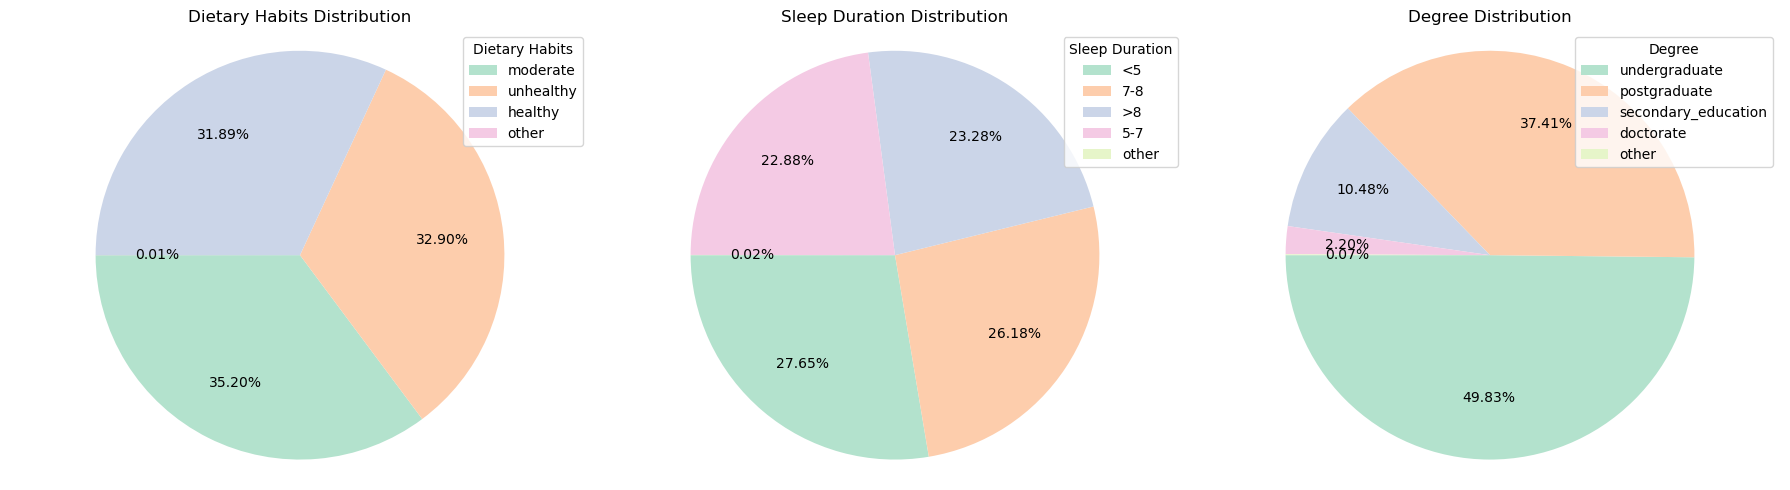

In [86]:
columns = ['dietary_habits', 'sleep_duration', 'degree']
fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))

for ax, col in zip(axes, columns):
    counts = X_train_transformed[col].value_counts()
    wedges, texts, autotexts = ax.pie(counts, labels=None, autopct='%1.2f%%', startangle=180, colors=plt.cm.Pastel2.colors, pctdistance=0.7)
    ax.set_title(f'{col.replace("_", " ").title()} Distribution')
    ax.axis('equal')
    ax.legend(counts.index, title=col.replace('_', ' ').title(), loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [87]:
class RareCategoryCombiner(BaseEstimator, TransformerMixin):
    """
    Combines rare categories in specified categorical columns into an 'other' label.
    Args:
    columns : Columns to process.
    min_count : Minimum count to retain a category.
    other_label : Label to assign to rare categories.
    """
    def __init__(self, columns, min_count=10, other_label='other'):
        self.columns = columns
        self.min_count = min_count
        self.other_label = other_label
        self.rare_cats_ = {}

    def fit(self, X: pd.DataFrame, y=None):
        for col in self.columns:
            counts = X[col].value_counts(dropna=True)
            self.rare_cats_[col] = counts[counts < self.min_count].index.tolist()
        return self

    def transform(self, X: pd.DataFrame):
        X = X.copy()
        for col in self.columns:
            mask = X[col].isin(self.rare_cats_[col])
            X.loc[mask, col] = self.other_label
        return X

    def set_output(self, transform="pandas"):
        return self


In [88]:
rare_grouper = RareCategoryCombiner(columns=['profession', 'city'], min_count=10, other_label='other')rare_grouper.fit(X_train_transformed)
X_train_transformed = rare_grouper.transform(X_train_transformed)
X_test_transformed = rare_grouper.transform(X_test_transformed)

In [89]:
custom_cat_pipe = Pipeline([
    ('cat_imputer_students', RelationalImputer(
        cols_to_impute=['profession'], 
        condition_col='occupation_status', 
        condition_value='Student',
        fill_value='Student')),
    ('cat_rare_combiner', RareCategoryCombiner(
        columns=['profession', 'city'],
        min_count=10,
        other_label='other')),
    ('cat_mapper', FeatureCategoryMapper(
        mappings=mappings,
        other_value='other',
        clean_func=clean_category)),
])

custom_cat_pipe.fit(X_train)

Pipeline(steps=[('cat_imputer_students',
                 RelationalImputer(cols_to_impute=['profession'],
                                   condition_col='occupation_status',
                                   condition_value='Student',
                                   fill_value='Student')),
                ('cat_rare_combiner',
                 RareCategoryCombiner(columns=['profession', 'city'])),
                ('cat_mapper',
                 FeatureCategoryMapper(clean_func=<function clean_category at 0x0000022762BE1440>,
                                       mappings={'de...
                                                 'dietary_habits': {'healthy': ['healthy'],
                                                                    'moderate': ['moderate'],
                                                                    'unhealthy': ['unhealthy']},
                                                 'sleep_duration': {'5-7': ['5-6hours',
                                                                            '4-6hours',
                                                                            '6-7hours'],
                                                                    '7-8': ['7-8hours',
                                                                            '6-8hours',
                                                                            '8hours'],
                                                                    '<5': ['lessthan5hours',
                                                                           '1-2hours',
                                                                           '1-3hours',
                                                                           '1-6hours',
                                                                           '2-3hours',
                                                                           '3-4hours',
                                                                           '3-6hours',
                                                                           '4-5hours'],
                                                                    '>8': ['morethan8hours',
                                                                           '9-11hours',
                                                                           '10-11hours',
                                                                           '8-9hours']}}))])

### 2.3.4 Numerical Variable Categorization - CGPA
In this step, we explore two alternative approaches for handling the cgpa variable, which is only meaningful for student respondents but not for working professionals.

**Approach 1: Binned CGPA**
- The continuous cgpa variable is discretized into categorical bins, such as "low", "medium", "high" based on predefined thresholds.  
- For working professionals with missing CGPA values, a dedicated category such as "not_applicable" is assigned, since CGPA does not apply to these cases.  
- For students with missing CGPA values, imputation is performed using the most frequent value (mode) among student responses.
- This approach enables the model to treat academic performance as a categorical feature and to explicitly distinguish between students and non-students.

**Approach 2: Continuous CGPA**
- The cgpa variable is retained as a continuous, numerical feature for students, with appropriate imputation for missing values.
- For working professionals with missing CGPA values, a constant -1 is assigned to indicate that CGPA is not applicable.
- For students with missing CGPA values, imputation is performed using the median value among student responses.


In [91]:
X_train_binning = X_train_transformed.copy()
X_test_binning = X_test_transformed.copy()

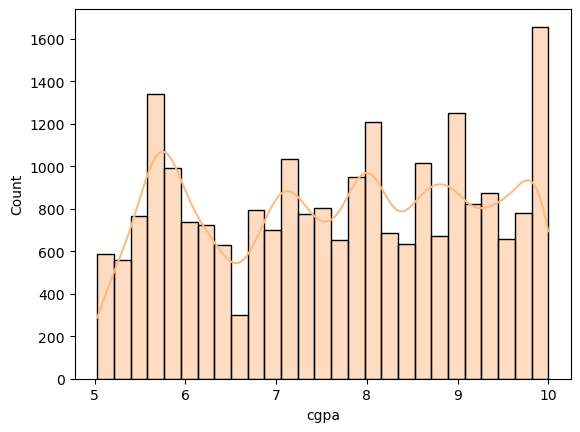

In [92]:
sns.histplot(data=X_train_binning[X_train_binning['cgpa'] != -1], x='cgpa', kde=True, color='#fdbb84')
plt.show()

In [93]:
class UniformBinner(BaseEstimator, TransformerMixin):

    def __init__(self, col, n_bins=3, labels=None):
        self.col = col
        self.n_bins = n_bins
        self.labels = labels if labels is not None else {i: f'bin_{i}' for i in range(n_bins)}
        self.est = None

    def fit(self, X: pd.DataFrame, y=None):
        mask = X[self.col].notna()
        self.est = KBinsDiscretizer(n_bins=self.n_bins, encode='ordinal', strategy='uniform')
        self.est.fit(X.loc[mask, [self.col]])
        return self

    def transform(self, X: pd.DataFrame):
        X = X.copy()
        mask_valid = X[self.col].notna()
        if mask_valid.any():
            X.loc[mask_valid, self.col] = (self.est.transform(X.loc[mask_valid, [self.col]]).astype(int).flatten())
            X[self.col] = X[self.col].astype(object)
            X.loc[mask_valid, self.col] = X.loc[mask_valid, self.col].map(self.labels)
        return X


In [94]:
categorizer = UniformBinner(col='cgpa', n_bins=3, labels={0: 'low', 1: 'medium', 2: 'high'})
categorizer.fit(X_train_binning)
X_train_binning = categorizer.transform(X_train_binning)
X_test_binning = categorizer.transform(X_test_binning)
X_train_binning.cgpa.value_counts()

cgpa
high      8362
medium    7593
low       6639
Name: count, dtype: int64

**Pipeline for handling cgpa**

In [96]:
cgpa_with_binning = Pipeline([
    ('binner', UniformBinner(col='cgpa', n_bins=4, labels={0: 'low', 1: 'medium', 2: 'high', 3: 'excellent'})),
    ('imputer_students_freq', RelationalImputer(
        cols_to_impute=['cgpa'],
        condition_col='occupation_status',
        condition_value='student',
        strategy='most_frequent',
    )),
    ('imputer_workers_const', RelationalImputer(
        cols_to_impute=['cgpa'],
        condition_col='occupation_status',
        condition_value='Working Professional',
        strategy='constant',
        fill_value='not_applicable',
    )),
])


cgpa_without_binning = Pipeline([
    ("imputer_students_median", RelationalImputer(
        cols_to_impute=['cgpa'],
        condition_col='occupation_status',
        condition_value='student',
        strategy='median',
    )),
    ('imputer_workers_const', RelationalImputer(
        cols_to_impute=['cgpa'],
        condition_col='occupation_status',
        condition_value='Working Professional',
        strategy='constant',
        fill_value=-1,
    )),
])
cgpa_without_binning.fit(X_train)

Pipeline(steps=[('imputer_students_median',
                 RelationalImputer(cols_to_impute=['cgpa'],
                                   condition_col='occupation_status',
                                   condition_value='student',
                                   strategy='median')),
                ('imputer_workers_const',
                 RelationalImputer(cols_to_impute=['cgpa'],
                                   condition_col='occupation_status',
                                   condition_value='Working Professional',
                                   fill_value=-1))])

In [97]:
cgpa_with_binning.fit(X_train)

Pipeline(steps=[('binner',
                 UniformBinner(col='cgpa',
                               labels={0: 'low', 1: 'medium', 2: 'high',
                                       3: 'excellent'},
                               n_bins=4)),
                ('imputer_students_freq',
                 RelationalImputer(cols_to_impute=['cgpa'],
                                   condition_col='occupation_status',
                                   condition_value='student',
                                   strategy='most_frequent')),
                ('imputer_workers_const',
                 RelationalImputer(cols_to_impute=['cgpa'],
                                   condition_col='occupation_status',
                                   condition_value='Working Professional',
                                   fill_value='not_applicable'))])

In [98]:
X_train_binned = cgpa_with_binning.transform(X_train)

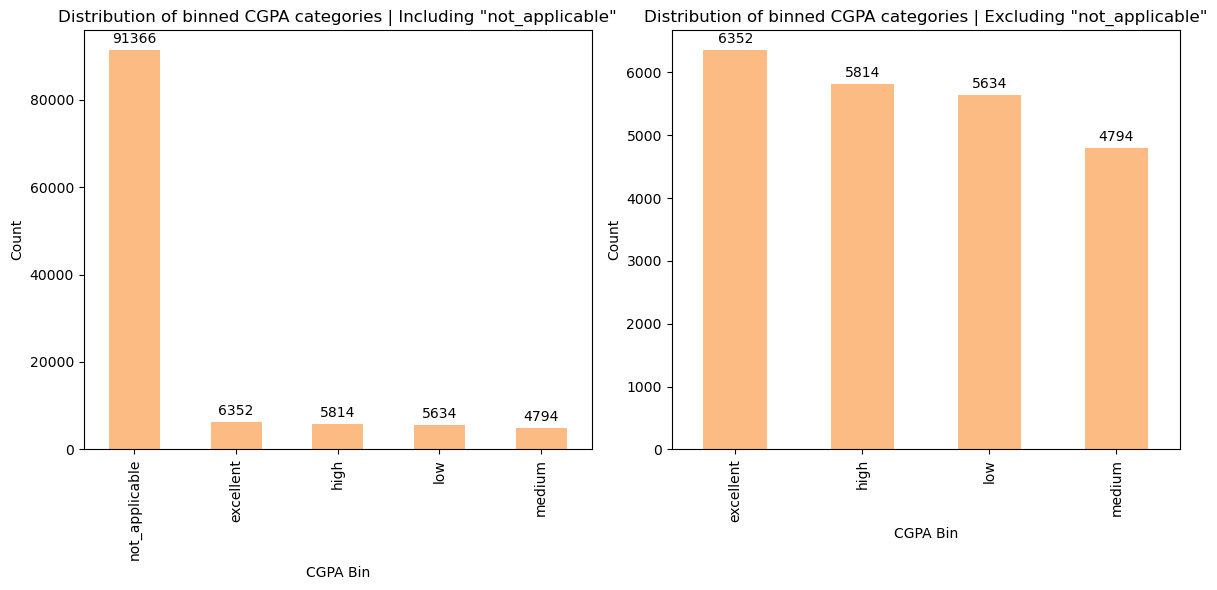

In [99]:
value_counts = X_train_binned.cgpa.value_counts()
value_counts_no_na = value_counts.drop('not_applicable')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot including 'not_applicable'
ax1 = value_counts.plot(kind='bar', color='#fdbb84', ax=axes[0])
ax1.set_xlabel('CGPA Bin')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of binned CGPA categories | Including "not_applicable"')
for i, v in enumerate(value_counts):
    ax1.text(i, v + value_counts.max()*0.01, str(v), ha='center', va='bottom')

# Plot excluding 'not_applicable'
ax2 = value_counts_no_na.plot(kind='bar', color='#fdbb84', ax=axes[1])
ax2.set_xlabel('CGPA Bin')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of binned CGPA categories | Excluding "not_applicable"')
for i, v in enumerate(value_counts_no_na):
    ax2.text(i, v + value_counts_no_na.max()*0.01, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2.3.5 Role-Based Custom Imputation for Numerical Variables

As demonstrated in the analysis before, many important features for depression prediction contain substantial missing values.  
Dropping these features would result in the loss of valuable information. Therefore, the next step is to impute the missing values in these columns to preserve as much relevant data as possible.

**Features:**  

`academic_pressure`, `work_pressure`, `study_satisfaction`, `job_satisfaction`, `cgpa`   

**Imputation strategy:**  

Missing values are imputed based on information whether person is student or working professional (`occupation_status`)  
   - If the person is a **student**:
       - missing values in academic-related columns are filled with the median for students,
       - missing values in work-related columns are filled with -1.
   - If the person is a **working professional**:
       - missing values in work-related columns are filled with the median for professionals
       - missing values inacademic-related columns are filled with -1.
     
Median values were calculated separately for student/professional subgroups to preserve population characteristics.

In [101]:
X_train_imputed = X_train_transformed.copy()
X_test_imputed = X_test_transformed.copy()

In [102]:
num_imputer_students_const = RelationalImputer(
            cols_to_impute=['work_pressure', 'job_satisfaction'],
            condition_col='occupation_status',
            condition_value='Student',
            strategy='constant',
            fill_value=-1,
)
num_imputer_students_const.fit(X_train_imputed)
X_train_imputed = num_imputer_students_const.transform(X_train_imputed)
X_test_imputed = num_imputer_students_const.transform(X_test_imputed)
# X_transformed [X_transformed.job_satisfaction == -1]
# X_train[(imputer.transform(X_train).job_satisfaction == -1)]

In [103]:
num_imputer_workers_const = RelationalImputer(
            cols_to_impute=['academic_pressure', 'study_satisfaction', 'cgpa'],
            condition_col='occupation_status',
            condition_value='Working Professional',
            strategy='constant',
            fill_value=-1,
)
num_imputer_workers_const.fit(X_train_imputed)
X_train_imputed = num_imputer_workers_const.transform(X_train_imputed)
X_test_imputed = num_imputer_workers_const.transform(X_test_imputed)

In [104]:
num_imputer_students_median = RelationalImputer(
            cols_to_impute=['academic_pressure', 'study_satisfaction', 'cgpa'],
            condition_col='occupation_status',
            condition_value='Student',
            strategy='median')
num_imputer_students_median.fit(X_train_imputed)
X_train_imputed = num_imputer_students_median.transform(X_train_imputed)
X_test_imputed = num_imputer_students_median.transform(X_test_imputed)


In [105]:
num_imputer_workers_median = RelationalImputer(
            cols_to_impute=['work_pressure', 'job_satisfaction'],
            condition_col='occupation_status',
            condition_value='Working Professional',
            strategy='median')
num_imputer_workers_median.fit(X_train_imputed)
X_train_imputed = num_imputer_workers_median.transform(X_train_imputed)
X_test_imputed = num_imputer_workers_median.transform(X_test_imputed)

In [106]:
X_train_imputed.work_pressure.value_counts()

work_pressure
-1.0    22593
 2.0    19738
 4.0    18312
 5.0    18140
 3.0    17736
 1.0    17448
Name: count, dtype: int64

In [107]:
custom_num_pipe = Pipeline([
    ('num_imputer_students_const', RelationalImputer(
        cols_to_impute=['work_pressure', 'job_satisfaction'],
        condition_col='occupation_status',
        condition_value='Student',
        strategy='constant',
        fill_value=-1,
    )),
    ('num_imputer_workers_const', RelationalImputer(
        cols_to_impute=['academic_pressure', 'study_satisfaction', 'cgpa'],
        condition_col='occupation_status',
        condition_value='Working Professional',
        strategy='constant',
        fill_value=-1,
    )),
    ('num_imputer_students_median', RelationalImputer(
        cols_to_impute=['academic_pressure', 'study_satisfaction', 'cgpa'],
        condition_col='occupation_status',
        condition_value='Student',
        strategy='median'
    )),
    ('num_imputer_workers_median', RelationalImputer(
        cols_to_impute=['work_pressure', 'job_satisfaction'],
        condition_col='occupation_status',
        condition_value='Working Professional',
        strategy='median'
    )),
])


custom_num_pipe.fit(X_train)

Pipeline(steps=[('num_imputer_students_const',
                 RelationalImputer(cols_to_impute=['work_pressure',
                                                   'job_satisfaction'],
                                   condition_col='occupation_status',
                                   condition_value='Student', fill_value=-1)),
                ('num_imputer_workers_const',
                 RelationalImputer(cols_to_impute=['academic_pressure',
                                                   'study_satisfaction',
                                                   'cgpa'],
                                   condition_col='occupation_status',
                                   condition_va...
                 RelationalImputer(cols_to_impute=['academic_pressure',
                                                   'study_satisfaction',
                                                   'cgpa'],
                                   condition_col='occupation_status',
                                   condition_value='Student',
                                   strategy='median')),
                ('num_imputer_workers_median',
                 RelationalImputer(cols_to_impute=['work_pressure',
                                                   'job_satisfaction'],
                                   condition_col='occupation_status',
                                   condition_value='Working Professional',
                                   strategy='median'))])

### 2.3.6 Feature Combination

To capture overall experiences, related variables were combined:

- `work_pressure` and `academic_pressure` were combined into a single pressure feature, representing the overall level of pressure experienced by an individual.
- `job_satisfaction` and `study_satisfaction` were combined into a single satisfaction feature, reflecting the individual's overall satisfaction with their work or studies.


In [109]:
class FeatureCombiner(BaseEstimator, TransformerMixin):
    """
    Combines two numerical columns using a specified aggregation strategy.
    Args
    col1: First column name.
    col2: Second column name.
    strategy: Aggregation method, {'max', 'min', 'sum', 'mean'}, default='max'
    new_col_name: Name of the new combined column.
    """
    def __init__(self, col1: str, col2: str, strategy='max', new_col_name=None):
        self.col1 = col1
        self.col2 = col2
        self.strategy = strategy
        self.new_col_name = new_col_name or f"{col1}_{strategy}_{col2}"

    def fit(self, X: pd.DataFrame, y=None):
        self.fitted_ = True
        return self

    def transform(self, X: pd.DataFrame, y=None):
        X = X.copy()
        if self.strategy == 'max':
            X[self.new_col_name] = X[[self.col1, self.col2]].max(axis=1)
        elif self.strategy == 'min':
            X[self.new_col_name] = X[[self.col1, self.col2]].min(axis=1)
        elif self.strategy == 'sum':
            X[self.new_col_name] = X[self.col1] + X[self.col2]
        elif self.strategy == 'mean':
            X[self.new_col_name] = (X[self.col1] + X[self.col2]) / 2
        else:
            raise ValueError(f"Unknown strategy: {self.strategy}")
        return X

    def set_output(self, transform="pandas"):
        return self

In [110]:
X_train_fe = X_train_imputed.copy()
X_test_fe = X_test_imputed.copy()

In [111]:
num_feature_combiner_pressure = FeatureCombiner('work_pressure', 'academic_pressure', strategy='max', new_col_name='work_academic_stress')
num_feature_combiner_pressure.fit(X_train_fe)
X_train_fe = num_feature_combiner_pressure.transform(X_train_fe)
X_test_fe = num_feature_combiner_pressure.transform(X_test_fe)

In [112]:
X_train_fe

,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,...,work_pressure_imputed,job_satisfaction_not_applicable,job_satisfaction_imputed,academic_pressure_not_applicable,academic_pressure_imputed,study_satisfaction_not_applicable,study_satisfaction_imputed,cgpa_not_applicable,cgpa_imputed,work_academic_stress
114324,Female,28.0,Delhi,Student,Student,2.0,-1.0,6.83,2.0,-1.0,...,0,1,0,0,0,0,0,0,0,2.0
25728,Female,60.0,Nagpur,Working Professional,Teacher,-1.0,5.0,-1.00,-1.0,4.0,...,0,0,0,1,0,1,0,1,0,5.0
117819,Male,37.0,Surat,Working Professional,Pharmacist,-1.0,4.0,-1.00,-1.0,3.0,...,0,0,0,1,0,1,0,1,0,4.0
48961,Male,33.0,Mumbai,Student,Student,2.0,-1.0,7.10,3.0,-1.0,...,0,1,0,0,0,0,0,0,0,2.0
99402,Female,51.0,Bhopal,Working Professional,Doctor,-1.0,2.0,-1.00,-1.0,5.0,...,0,0,0,1,0,1,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640,Male,49.0,Rajkot,Working Professional,Teacher,-1.0,1.0,-1.00,-1.0,3.0,...,0,0,0,1,0,1,0,1,0,1.0
132671,Female,49.0,Vadodara,Working Professional,Teacher,-1.0,1.0,-1.00,-1.0,3.0,...,0,0,0,1,0,1,0,1,0,1.0
50641,Male,21.0,Mumbai,Student,Student,5.0,-1.0,7.68,2.0,-1.0,...,0,1,0,0,0,0,0,0,0,5.0
106167,Female,29.0,Mumbai,Student,Student,1.0,-1.0,6.02,5.0,-1.0,...,0,1,0,0,0,0,0,0,0,1.0


In [113]:
num_feature_combiner_satisfaction = FeatureCombiner(col1='job_satisfaction', col2='study_satisfaction', strategy='max', new_col_name='job_study_satisfaction')
num_feature_combiner_satisfaction.fit(X_train_fe)
X_train_fe = num_feature_combiner_satisfaction.transform(X_train_fe)
X_test_fe = num_feature_combiner_satisfaction.transform(X_test_fe)

In [114]:
feature_combiner_pipe = Pipeline([
    ('num_feature_combiner_satisfaction', FeatureCombiner(col1='job_satisfaction', col2='study_satisfaction', 
                                                      strategy='max', 
                                                      new_col_name='job_study_satisfaction')),
    ('num_feature_combiner_pressure', FeatureCombiner('work_pressure', 'academic_pressure',
                                                     strategy='max', 
                                                     new_col_name='work_academic_stress')),
])

feature_combiner_pipe.fit(X_train)

Pipeline(steps=[('num_feature_combiner_satisfaction',
                 FeatureCombiner(col1='job_satisfaction',
                                 col2='study_satisfaction',
                                 new_col_name='job_study_satisfaction')),
                ('num_feature_combiner_pressure',
                 FeatureCombiner(col1='work_pressure', col2='academic_pressure',
                                 new_col_name='work_academic_stress'))])

### 2.3.7 Pipeline for flagger and custom preprocessing

In [116]:
custom_preprocessor = Pipeline([
        ('custom_cat', custom_cat_pipe),
        ('custom_num', custom_num_pipe),
        ('feature_combiner', feature_combiner_pipe)
    ])

pipeline = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
    ("custom_preprocessor", custom_preprocessor)
])

pipeline.fit(X_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                                                     'Professional',
                                                                     strategy='median'))])),
                                 ('feature_combiner',
                                  Pipeline(steps=[('num_feature_combiner_satisfaction',
                                                   FeatureCombiner(col1='job_satisfaction',
                                                                   col2='study_satisfaction',
                                                                   new_col_name='job_study_satisfaction')),
                                                  ('num_feature_combiner_pressure',
                                                   FeatureCombiner(col1='work_pressure',
                                                                   col2='academic_pressure',
                                                                   new_col_name='work_academic_stress'))]))]))])

## 2.4 Standard preprocessing

### 2.4.1 Standard Imputation for Categorical Variables

`cat_binary_features` - imputation with most frequent  
`cat_multiclass_features` - imputation with constant "other"   
`cat_highcard_features` - imputation with constant "other" 

In [119]:
X_train_cleaned = X_train_fe.copy()
X_test_cleaned = X_test_fe.copy()

In [120]:
# missing values of numerical features
cat_features = ['gender', 'city', 'occupation_status', 'profession', 'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts', 'family_history_mental_illness']
missing_count= X_train_cleaned[cat_features].isnull().sum().sort_values(ascending=False)
missing_count= missing_count[missing_count > 0]
missing_percent = (missing_count/len(X_train_cleaned[cat_features])) * 100
df_missing = pd.DataFrame({'Missing train values: counts': missing_count, "Missing train values: percentage": missing_percent.round(3)})
df_missing

,Missing train values: counts,Missing train values: percentage
profession,7136,6.261
dietary_habits,4,0.004
degree,2,0.002


In [121]:
cat_binary_features = ["gender", "occupation_status", "suicidal_thoughts", "family_history_mental_illness"]
cat_multiclass_features = ["dietary_habits", "sleep_duration", "degree"]
cat_highcard_features = ["profession", "city"]

In [122]:
imputer_freq = SimpleImputer(strategy='most_frequent')
imputer_freq.fit(X_train_cleaned[cat_binary_features])
X_train_cleaned[cat_binary_features] = imputer_freq.transform(X_train_cleaned[cat_binary_features])
X_test_cleaned[cat_binary_features] = imputer_freq.transform(X_test_cleaned[cat_binary_features])

In [123]:
imputer_freq = SimpleImputer(strategy='constant', fill_value="other")
imputer_freq.fit(X_train_cleaned[cat_multiclass_features+cat_highcard_features])
X_train_cleaned[cat_multiclass_features+cat_highcard_features] = imputer_freq.transform(X_train_cleaned[cat_multiclass_features+cat_highcard_features])
X_test_cleaned[cat_multiclass_features+cat_highcard_features] = imputer_freq.transform(X_test_cleaned[cat_multiclass_features+cat_highcard_features])

In [124]:
# Checking if there are remaining missing values 
X_train_cleaned[cat_features].isna().sum(), X_test_cleaned[cat_features].isna().sum()

(gender                           0
 city                             0
 occupation_status                0
 profession                       0
 sleep_duration                   0
 dietary_habits                   0
 degree                           0
 suicidal_thoughts                0
 family_history_mental_illness    0
 dtype: int64,
 gender                           0
 city                             0
 occupation_status                0
 profession                       0
 sleep_duration                   0
 dietary_habits                   0
 degree                           0
 suicidal_thoughts                0
 family_history_mental_illness    0
 dtype: int64)

### 2.4.2 Standard Imputation for Numerical Variables

`work_study_hours`, `financial_stress`, `age`, `work_academic_stress`, `job_study_satisfaction`  - missing values are filled with median of the column.  

In [126]:
num_features = (X_train_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist())
print(num_features)

['age', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'work_study_hours', 'financial_stress', 'work_pressure_not_applicable', 'work_pressure_imputed', 'job_satisfaction_not_applicable', 'job_satisfaction_imputed', 'academic_pressure_not_applicable', 'academic_pressure_imputed', 'study_satisfaction_not_applicable', 'study_satisfaction_imputed', 'cgpa_not_applicable', 'cgpa_imputed', 'work_academic_stress', 'job_study_satisfaction']


In [127]:
# missing values of numerical features
missing_count= X_train_cleaned[num_features].isnull().sum().sort_values(ascending=False)
missing_count= missing_count[missing_count > 0]
missing_percent = (missing_count/len(X_train_cleaned[num_features])) * 100

df_missing = pd.DataFrame({'Missing train values: counts': missing_count, "Missing train values: percentage": missing_percent.round(3)})
df_missing

,Missing train values: counts,Missing train values: percentage
financial_stress,3,0.003


In [128]:
num_standard_features = ['age', 'work_study_hours', 'financial_stress', 'work_academic_stress', 'job_study_satisfaction']
imputer_median = SimpleImputer(strategy='median')
imputer_median.fit(X_train_cleaned[num_standard_features])
X_train_cleaned[num_standard_features] = imputer_median.transform(X_train_cleaned[num_standard_features])
X_test_cleaned[num_standard_features] = imputer_median.transform(X_test_cleaned[num_standard_features])

In [129]:
# Checking if there are remaining missing values 
X_train_cleaned[num_standard_features].isnull().sum().sort_values(ascending=False), X_test_cleaned[num_standard_features].isnull().sum().sort_values(ascending=False)

(age                       0
 work_study_hours          0
 financial_stress          0
 work_academic_stress      0
 job_study_satisfaction    0
 dtype: int64,
 age                       0
 work_study_hours          0
 financial_stress          0
 work_academic_stress      0
 job_study_satisfaction    0
 dtype: int64)

### 2.4.3 Encoding Categorical Variables

`cat_binary_features` - encoding with OrdinalEncoder  
`cat_multiclass_features` - encoding with OneHotEncoder   
`cat_highcard_features` - encoding with TargetEncoder 

In [131]:
X_train_encoded= X_train_cleaned.copy()
X_test_encoded = X_test_cleaned.copy()

In [132]:
encoder_oe = OrdinalEncoder()
encoder_oe.fit(X_train_encoded[cat_binary_features])
X_train_encoded[cat_binary_features] = encoder_oe.transform(X_train_encoded[cat_binary_features])
X_test_encoded[cat_binary_features] = encoder_oe.transform(X_test_encoded[cat_binary_features])

In [133]:
encoder_te = TargetEncoder()
encoder_te.fit(X_train_encoded[cat_highcard_features], y_train)
X_train_encoded[cat_highcard_features] = encoder_te.transform(X_train_encoded[cat_highcard_features])

In [134]:
X_train_en = pd.get_dummies(X_train_encoded[cat_multiclass_features])
X_test_en = pd.get_dummies(X_test_encoded[cat_multiclass_features])

X_train_encoded_full = pd.concat([X_train_encoded[num_features+cat_binary_features], X_train_en], axis=1)
X_test_encoded_full = pd.concat([X_test_encoded[num_features+cat_binary_features], X_test_en], axis=1)
X_train_encoded_full.columns

Index(['age', 'academic_pressure', 'work_pressure', 'cgpa',
       'study_satisfaction', 'job_satisfaction', 'work_study_hours',
       'financial_stress', 'work_pressure_not_applicable',
       'work_pressure_imputed', 'job_satisfaction_not_applicable',
       'job_satisfaction_imputed', 'academic_pressure_not_applicable',
       'academic_pressure_imputed', 'study_satisfaction_not_applicable',
       'study_satisfaction_imputed', 'cgpa_not_applicable', 'cgpa_imputed',
       'work_academic_stress', 'job_study_satisfaction', 'gender',
       'occupation_status', 'suicidal_thoughts',
       'family_history_mental_illness', 'dietary_habits_healthy',
       'dietary_habits_moderate', 'dietary_habits_other',
       'dietary_habits_unhealthy', 'sleep_duration_5-7', 'sleep_duration_7-8',
       'sleep_duration_<5', 'sleep_duration_>8', 'sleep_duration_other',
       'degree_doctorate', 'degree_other', 'degree_postgraduate',
       'degree_secondary_education', 'degree_undergraduate'],
     

In [135]:
encoder_ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder_ohe.fit(X_train_encoded[cat_multiclass_features])

X_train_ohe = encoder_ohe.transform(X_train_encoded[cat_multiclass_features])
X_test_ohe = encoder_ohe.transform(X_test_encoded[cat_multiclass_features])


X_train_encoded_df = pd.DataFrame(X_train_ohe, columns=encoder_ohe.get_feature_names_out(cat_multiclass_features), index=X_train_encoded[cat_multiclass_features].index)
X_test_encoded_df = pd.DataFrame(X_test_ohe, columns=encoder_ohe.get_feature_names_out(cat_multiclass_features), index=X_test_encoded[cat_multiclass_features].index)

X_train_encoded_full = pd.concat([X_train_encoded[num_features+cat_binary_features+cat_highcard_features], X_train_encoded_df], axis=1)
X_test_encoded_full = pd.concat([X_test_encoded[num_features+cat_binary_features+cat_highcard_features], X_test_encoded_df], axis=1)
X_train_encoded_full.columns

Index(['age', 'academic_pressure', 'work_pressure', 'cgpa',
       'study_satisfaction', 'job_satisfaction', 'work_study_hours',
       'financial_stress', 'work_pressure_not_applicable',
       'work_pressure_imputed', 'job_satisfaction_not_applicable',
       'job_satisfaction_imputed', 'academic_pressure_not_applicable',
       'academic_pressure_imputed', 'study_satisfaction_not_applicable',
       'study_satisfaction_imputed', 'cgpa_not_applicable', 'cgpa_imputed',
       'work_academic_stress', 'job_study_satisfaction', 'gender',
       'occupation_status', 'suicidal_thoughts',
       'family_history_mental_illness', 'profession', 'city',
       'dietary_habits_healthy', 'dietary_habits_moderate',
       'dietary_habits_other', 'dietary_habits_unhealthy',
       'sleep_duration_5-7', 'sleep_duration_7-8', 'sleep_duration_<5',
       'sleep_duration_>8', 'sleep_duration_other', 'degree_doctorate',
       'degree_other', 'degree_postgraduate', 'degree_secondary_education',
       '

### 2.4.4 Scaling Numerical Variables

In [137]:
print(num_features)

['age', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'work_study_hours', 'financial_stress', 'work_pressure_not_applicable', 'work_pressure_imputed', 'job_satisfaction_not_applicable', 'job_satisfaction_imputed', 'academic_pressure_not_applicable', 'academic_pressure_imputed', 'study_satisfaction_not_applicable', 'study_satisfaction_imputed', 'cgpa_not_applicable', 'cgpa_imputed', 'work_academic_stress', 'job_study_satisfaction']


In [138]:
X_train_scaled = X_train_encoded_full.copy()
X_test_scaled = X_test_encoded_full.copy()

In [139]:
scaler = StandardScaler()
scaler.fit(X_train_scaled[num_features])
X_train_scaled[num_features] = scaler.transform(X_train_scaled[num_features])
X_test_scaled[num_features] = scaler.transform(X_test_scaled[num_features])

### 2.4.5 Pipeline for flagger, custom and standard preprocessing

In [141]:
num_custom_features = ['academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction']
num_standard_features = ['age', 'work_study_hours', 'financial_stress', 'work_academic_stress', 'job_study_satisfaction']

cat_binary_features = ["gender", "occupation_status", "suicidal_thoughts", "family_history_mental_illness"]
cat_multiclass_features = ["dietary_habits", "sleep_duration", "degree"]
cat_highcard_features = ["profession", "city"]


num_standard_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

num_custom_pipe = Pipeline([
    ("scaler", StandardScaler()),
])

num_preprocessor = ColumnTransformer([
    ("num_standard", num_standard_pipe, num_standard_features),
    ("num_custom", num_custom_pipe, num_custom_features),
])


cat_multiclass_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="other")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),

])

cat_highcard_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="other")),
    ("encoder", TargetEncoder()),
])


cat_binary_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OrdinalEncoder()),
])


cat_preprocessor = ColumnTransformer([
    ("cat_multiclass", cat_multiclass_pipe, cat_multiclass_features),
    ("cat_highcard", cat_highcard_pipe, cat_highcard_features),
    ("cat_binary", cat_binary_pipe, cat_binary_features),
])

standard_preprocessor = ColumnTransformer([
    ("numerical", num_preprocessor, num_standard_features+num_custom_features),
    ("categorical", cat_preprocessor, cat_binary_features+cat_multiclass_features+cat_highcard_features),
],remainder='passthrough', force_int_remainder_cols=False)



preprocess_pipeline = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
    ("custom_preprocessor", custom_preprocessor),
    ("standard_preprocessor", standard_preprocessor),
])

preprocess_pipeline.fit(X_train,y_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                                                  ('cat_binary',
                                                                                   Pipeline(steps=[('imputer',
                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                   ('encoder',
                                                                                                    OrdinalEncoder())]),
                                                                                   ['gender',
                                                                                    'occupation_status',
                                                                                    'suicidal_thoughts',
                                                                                    'family_history_mental_illness'])]),
                                                  ['gender',
                                                   'occupation_status',
                                                   'suicidal_thoughts',
                                                   'family_history_mental_illness',
                                                   'dietary_habits',
                                                   'sleep_duration', 'degree',
                                                   'profession', 'city'])]))])

# 3. Feature Selection
In this step, a **model-based feature selection** approach is implemented using the `SelectFromModel` with a `RandomForestClassifier` to identify the most predictive features.  

The threshold for feature importance is set to 0.01, ensuring that only features with a meaningful impact are selected.  
Various parameters of this feature selection process are further optimized using GridSearch.

In [143]:
full_pipeline = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
    ("custom_preprocessor", custom_preprocessor),
    ("standard_preprocessor", standard_preprocessor),
    ("feature_selector", SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), threshold=0.01))
])
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                                                    'occupation_status',
                                                                                    'suicidal_thoughts',
                                                                                    'family_history_mental_illness'])]),
                                                  ['gender',
                                                   'occupation_status',
                                                   'suicidal_thoughts',
                                                   'family_history_mental_illness',
                                                   'dietary_habits',
                                                   'sleep_duration', 'degree',
                                                   'profession', 'city'])])),
                ('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                                  random_state=42),
                                 threshold=0.01))])

# 4. Training and Hyperparameter Tuning 

To maximize predictive performance, hyperparameter optimization is performed using GridSearchCV on both Logistic Regression and Random Forest models.  
The tuning process explores a comprehensive parameter grid that includes not only model-specific settings but also parameters for feature selection methods.

In [145]:
cv =StratifiedKFold(3, shuffle=True, random_state=42)

In [146]:
primary_scoring = "f1_weighted"

## 4.1 Training and tuning LogisticRegression

In [148]:
pipeline_lr = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
    ("custom_preprocessor", custom_preprocessor),
    ("standard_preprocessor", standard_preprocessor),
    ("feature_selector",  SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), threshold=0.01)),
    ("model", LogisticRegression(class_weight="balanced", random_state=42, solver="saga",  max_iter=4000)),
])
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                   'occupation_status',
                                                   'suicidal_thoughts',
                                                   'family_history_mental_illness',
                                                   'dietary_habits',
                                                   'sleep_duration', 'degree',
                                                   'profession', 'city'])])),
                ('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                                  random_state=42),
                                 threshold=0.01)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=4000,
                                    random_state=42, solver='saga'))])

In [149]:
feature_selector_options = [
    {"feature_selector": ["passthrough"]}, 
    {"feature_selector": [SelectFromModel(
        RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        threshold=0.01)], 
     "feature_selector__threshold": [0.001],
     "feature_selector__estimator__max_depth": [10],
    }
]

lr_base_params = {
    "standard_preprocessor__categorical__cat_multiclass__encoder__drop": ["first"],
    "model__C": [10],
    "model__penalty": ["l1"],
}

lr_param_grid = [
    {**lr_base_params, **selector} for selector in feature_selector_options]
lr_param_grid

[{'standard_preprocessor__categorical__cat_multiclass__encoder__drop': ['first'],
  'model__C': [10],
  'model__penalty': ['l1'],
  'feature_selector': ['passthrough']},
 {'standard_preprocessor__categorical__cat_multiclass__encoder__drop': ['first'],
  'model__C': [10],
  'model__penalty': ['l1'],
  'feature_selector': [SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   threshold=0.01)],
  'feature_selector__threshold': [0.001],
  'feature_selector__estimator__max_depth': [10]}]

In [150]:
optimizer_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=lr_param_grid,
    scoring=primary_scoring,
    cv=cv,
    verbose=2)
optimizer_lr.fit(X_train, y_train)
lr_best_estimator = optimizer_lr.best_estimator_
lr_best_params = optimizer_lr.best_params_
lr_best_score = optimizer_lr.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END feature_selector=passthrough, model__C=10, model__penalty=l1, standard_preprocessor__categorical__cat_multiclass__encoder__drop=first; total time= 3.7min
[CV] END feature_selector=passthrough, model__C=10, model__penalty=l1, standard_preprocessor__categorical__cat_multiclass__encoder__drop=first; total time= 1.9min
[CV] END feature_selector=passthrough, model__C=10, model__penalty=l1, standard_preprocessor__categorical__cat_multiclass__encoder__drop=first; total time= 5.3min
[CV] END feature_selector=SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold=0.01), feature_selector__estimator__max_depth=10, feature_selector__threshold=0.001, model__C=10, model__penalty=l1, standard_preprocessor__categorical__cat_multiclass__encoder__drop=first; total time= 1.2min
[CV] END feature_selector=SelectFromModel(estimato

In [151]:
print("PIPELINE | LOGISTIC REGRESSION")
print(f"GridSearchCV completed.")
print(f"Best model includes feature selection: {isinstance(lr_best_estimator.named_steps['feature_selector'], SelectFromModel)}")
print(f"Best params: {lr_best_params}")
print(f"Best score: {lr_best_score}")

PIPELINE | LOGISTIC REGRESSION
GridSearchCV completed.
Best model includes feature selection: True
Best params: {'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold=0.01), 'feature_selector__estimator__max_depth': 10, 'feature_selector__threshold': 0.001, 'model__C': 10, 'model__penalty': 'l1', 'standard_preprocessor__categorical__cat_multiclass__encoder__drop': 'first'}
Best score: 0.9197684175639859


## 4.2 Training and tuning RandomForestClassifier

In [153]:
pipeline_rf = Pipeline([
    ("inconsistency_flagger", InconsistencyFlagger()),
    ("conditional_flagger", ConditionalFlagger(flagging_map)),
    ("custom_preprocessor", custom_preprocessor),
    ("standard_preprocessor", standard_preprocessor),
    ("feature_selector",  SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced', random_state=42), threshold=0.01)),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=42)),
])
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                  ['gender',
                                                   'occupation_status',
                                                   'suicidal_thoughts',
                                                   'family_history_mental_illness',
                                                   'dietary_habits',
                                                   'sleep_duration', 'degree',
                                                   'profession', 'city'])])),
                ('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                                  random_state=42),
                                 threshold=0.01)),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [154]:
feature_selector_options = [
    {"feature_selector": ["passthrough"]}, 
    {"feature_selector": [SelectFromModel(
        RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        threshold=0.01)], 
     "feature_selector__threshold": [0.001],
     "feature_selector__estimator__max_depth": [10],
    }
]

rf_base_params = {
    "standard_preprocessor__categorical__cat_multiclass__encoder__drop": [None],
    "model__n_estimators": [100],
    "model__max_depth": [10],
    "model__min_samples_leaf": [2]
}

rf_param_grid = [
    {**rf_base_params, **selector} for selector in feature_selector_options]
rf_param_grid

[{'standard_preprocessor__categorical__cat_multiclass__encoder__drop': [None],
  'model__n_estimators': [100],
  'model__max_depth': [10],
  'model__min_samples_leaf': [2],
  'feature_selector': ['passthrough']},
 {'standard_preprocessor__categorical__cat_multiclass__encoder__drop': [None],
  'model__n_estimators': [100],
  'model__max_depth': [10],
  'model__min_samples_leaf': [2],
  'feature_selector': [SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   threshold=0.01)],
  'feature_selector__threshold': [0.001],
  'feature_selector__estimator__max_depth': [10]}]

In [155]:
optimizer_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=rf_param_grid,
    scoring=primary_scoring,
    cv=cv,
    verbose=2)
optimizer_rf.fit(X_train, y_train)
rf_best_estimator = optimizer_rf.best_estimator_
rf_best_params = optimizer_rf.best_params_
rf_best_score = optimizer_rf.best_score_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END feature_selector=passthrough, model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100, standard_preprocessor__categorical__cat_multiclass__encoder__drop=None; total time=  10.1s
[CV] END feature_selector=passthrough, model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100, standard_preprocessor__categorical__cat_multiclass__encoder__drop=None; total time=   8.9s
[CV] END feature_selector=passthrough, model__max_depth=10, model__min_samples_leaf=2, model__n_estimators=100, standard_preprocessor__categorical__cat_multiclass__encoder__drop=None; total time=   9.2s
[CV] END feature_selector=SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold=0.01), feature_selector__estimator__max_depth=10, feature_selector__threshold=0.001, model__max_depth=10, model__min_samples_leaf=2, model_

In [156]:
print("PIPELINE | RANDOM FOREST CLASSIFIER")
print(f"GridSearchCV completed.")
print(f"Best model includes feature selection: {isinstance(rf_best_estimator.named_steps['feature_selector'], SelectFromModel)}")
print(f"Best params: {rf_best_params}")
print(f"Best score: {rf_best_score}")

PIPELINE | RANDOM FOREST CLASSIFIER
GridSearchCV completed.
Best model includes feature selection: True
Best params: {'feature_selector': SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                 random_state=42),
                threshold=0.01), 'feature_selector__estimator__max_depth': 10, 'feature_selector__threshold': 0.001, 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__n_estimators': 100, 'standard_preprocessor__categorical__cat_multiclass__encoder__drop': None}
Best score: 0.9243054087860271


# 5. Evaluation on validation data | Threshold tuning 

## 5.1 Evaluation LogisticRegression

In [159]:
models_selection_results = {}

In [160]:
def make_json_serializable(obj):
    if isinstance(obj, dict):
        return {k: make_json_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [make_json_serializable(v) for v in obj]
    elif isinstance(obj, (str, int, float, bool, type(None))):
        return obj
    else:
        return str(obj)

In [161]:
def evaluate_model(y_test, y_pred, y_proba=None):

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="macro")
    precision = precision_score(y_test, y_pred, average="macro")
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    metrics = {
        "accuracy": accuracy,
        "recall": recall,
        "precision": precision,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "roc_auc": roc_auc,
        "confusion_matrix": cm.tolist(),
    }
    return metrics

In [162]:
def show_roc(y, y_pred, steps=2):
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
    auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Imperfect Classifier')
    plt.xlim([0.0, 0.4])
    plt.ylim([0.6, 1.0])
    
    for i in range(0, len(thresholds),steps):
        plt.annotate('Th = {:.2f}'.format(thresholds[i]), (fpr[i], tpr[i]))
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [163]:
y_val_pred_default_lr = lr_best_estimator.predict(X_val)
y_val_proba_lr = lr_best_estimator.predict_proba(X_val)[:, 1]

In [164]:
print("EVALUATION ON VALIDATION DATA | RANDOM FOREST CLASSIFIER")
lr_default_report = classification_report(y_val, y_val_pred_default_lr)
print(f"Classification report with default threshold:: \n {lr_default_report}")

lr_metrics_default = evaluate_model(y_val, y_val_pred_default_lr, y_proba=y_val_proba_lr)
print(f"F1-Score-weighted: {lr_metrics_default['f1_weighted']:.4f}")
print(f"Recall: {lr_metrics_default['recall']:.4f}")
if lr_metrics_default['roc_auc'] is not None:
    print(f"ROC-AUC score: {lr_metrics_default['roc_auc']:.4f}")
print(f"Confusion matrix: {lr_metrics_default['confusion_matrix']}")

EVALUATION ON VALIDATION DATA | RANDOM FOREST CLASSIFIER
Classification report with default threshold:: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95     10362
           1       0.70      0.93      0.80      2301

    accuracy                           0.91     12663
   macro avg       0.84      0.92      0.87     12663
weighted avg       0.93      0.91      0.92     12663

F1-Score-weighted: 0.9194
Recall: 0.9223
ROC-AUC score: 0.9746
Confusion matrix: [[9437, 925], [152, 2149]]


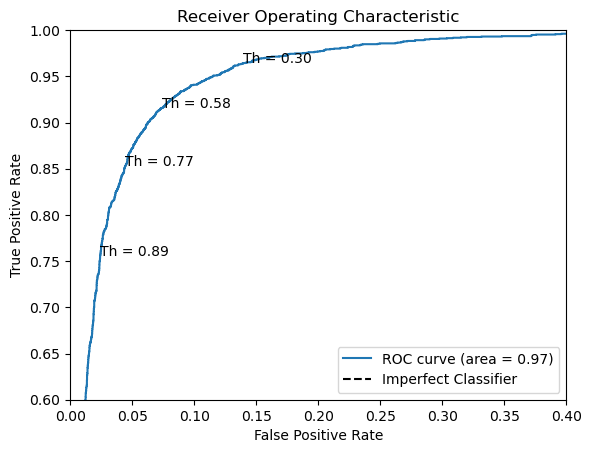

In [165]:
show_roc(y_val, y_val_proba_lr, steps=200)

In [166]:
# Threshold tuning (e.g., maximize recall or F1)
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba_lr)
best_idx = np.argmax(tpr - fpr)
best_threshold_lr = thresholds[best_idx]
best_threshold_lr

0.5008160450226105

In [167]:
# Predict with tuned threshold
y_val_pred_tuned_lr = (y_val_proba_lr >= best_threshold_lr).astype(int)
lr_tuned_report = classification_report(y_val, y_val_pred_tuned_lr)
print(f"Classification report after threshold tuning: \n{lr_tuned_report}")

lr_metrics_tuned = evaluate_model(y_val, y_val_pred_tuned_lr, y_proba=y_val_proba_lr)
print(f"F1-score (weighted): {lr_metrics_tuned['f1_weighted']:.4f}")
print(f"Recall: {lr_metrics_tuned['recall']:.4f}")
if lr_metrics_tuned['roc_auc'] is not None:
    print(f"ROC-AUC score: {lr_metrics_tuned['roc_auc']:.4f}")
print(f"Confusion matrix: {lr_metrics_tuned['confusion_matrix']}") 

Classification report after threshold tuning: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     10362
           1       0.70      0.93      0.80      2301

    accuracy                           0.92     12663
   macro avg       0.84      0.92      0.87     12663
weighted avg       0.93      0.92      0.92     12663

F1-score (weighted): 0.9195
Recall: 0.9224
ROC-AUC score: 0.9746
Confusion matrix: [[9438, 924], [152, 2149]]


In [168]:
lr_best_params_serializable = make_json_serializable(lr_best_params)
metadata_lr = {
    "model_name": 'logistic_regression',
    "best_score": lr_best_score,
    "best_params": lr_best_params_serializable,
    "metrics_default": lr_metrics_default,
    "metrics_tuned": lr_metrics_tuned,
    "best_threshold": float(best_threshold_lr),
}
metadata_lr

{'model_name': 'logistic_regression',
 'best_score': 0.9197684175639859,
 'best_params': {'feature_selector': "SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',\n                                                 random_state=42),\n                threshold=0.01)",
  'feature_selector__estimator__max_depth': 10,
  'feature_selector__threshold': 0.001,
  'model__C': 10,
  'model__penalty': 'l1',
  'standard_preprocessor__categorical__cat_multiclass__encoder__drop': 'first'},
 'metrics_default': {'accuracy': 0.9149490642027955,
  'recall': 0.9223366417310064,
  'precision': 0.8416188190857652,
  'f1_macro': 0.8728228252241247,
  'f1_weighted': 0.9194171737980908,
  'roc_auc': 0.9745781585358396,
  'confusion_matrix': [[9437, 925], [152, 2149]]},
 'metrics_tuned': {'accuracy': 0.9150280344310195,
  'recall': 0.922384894963973,
  'precision': 0.8417333925572623,
  'f1_macro': 0.8729236360044158,
  'f1_weighted': 0.9194874384076059,
  'roc_auc': 0.9745781585358396,
  '

In [169]:
models_selection_results['logistic_regression'] = {
    # GridSearchCV results
    "estimator": lr_best_estimator,
    "best_score": lr_best_score,
    "best_params": lr_best_params,
    # Default threshold metrics
    "val_recall_default": lr_metrics_default["recall"],
    "val_precision_default": lr_metrics_default["precision"],
    "val_f1_weighted_default": lr_metrics_default["f1_weighted"],
    "val_roc_auc_default": lr_metrics_default["roc_auc"],
    # Tuned threshold metrics
    "val_recall_tuned": lr_metrics_tuned["recall"],
    "val_precision_tuned": lr_metrics_tuned["precision"],
    "val_f1_weighted_tuned": lr_metrics_tuned["f1_weighted"],
    "val_roc_auc_tuned": lr_metrics_tuned["roc_auc"],
    # Threshold info
    "best_threshold": best_threshold_lr
}

## 5.2 Evaluation RandomForest


In [171]:
y_val_pred_default_rf = rf_best_estimator.predict(X_val)
y_val_proba_rf = rf_best_estimator.predict_proba(X_val)[:, 1]

In [172]:
print("EVALUATION ON VALIDATION DATA | RANDOM FOREST CLASSIFIER")
rf_default_report = classification_report(y_val, y_val_pred_default_rf)
print(f"Classification report with default threshold:: \n {rf_default_report}")

rf_metrics_default = evaluate_model(y_val, y_val_pred_default_rf, y_proba=y_val_proba_rf)
print(f"F1-Score-weighted: {rf_metrics_default['f1_weighted']:.4f}")
print(f"Recall: {rf_metrics_default['recall']:.4f}")
if rf_metrics_default['roc_auc'] is not None:
    print(f"ROC-AUC score: {rf_metrics_default['roc_auc']:.4f}")
print(f"Confusion matrix: {rf_metrics_default['confusion_matrix']}")

EVALUATION ON VALIDATION DATA | RANDOM FOREST CLASSIFIER
Classification report with default threshold:: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     10362
           1       0.72      0.91      0.80      2301

    accuracy                           0.92     12663
   macro avg       0.85      0.92      0.88     12663
weighted avg       0.93      0.92      0.92     12663

F1-Score-weighted: 0.9225
Recall: 0.9170
ROC-AUC score: 0.9727
Confusion matrix: [[9533, 829], [198, 2103]]


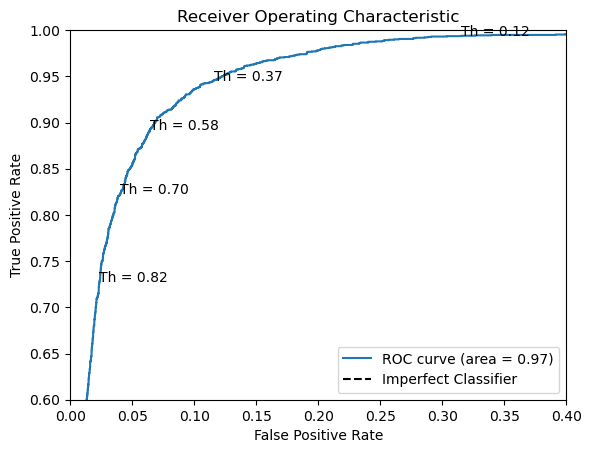

In [173]:
show_roc(y_val, y_val_proba_rf, steps=200)

In [174]:
# Threshold tuning (e.g., maximize recall or F1)
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba_rf)
best_idx = np.argmax(tpr - fpr)
best_threshold_rf = thresholds[best_idx]
best_threshold_rf

0.43973462820808334

In [175]:
# Predict with tuned threshold
y_val_pred_tuned_rf = (y_val_proba_rf >= best_threshold_rf).astype(int)
rf_tuned_report = classification_report(y_val, y_val_pred_tuned_rf)
print(f"Classification report after threshold tuning: \n{rf_tuned_report}")

rf_metrics_tuned = evaluate_model(y_val, y_val_pred_tuned_rf, y_proba=y_val_proba_rf)
print(f"F1-score (weighted): {rf_metrics_tuned['f1_weighted']:.4f}")
print(f"Recall: {rf_metrics_tuned['recall']:.4f}")
if rf_metrics_tuned['roc_auc'] is not None:
    print(f"ROC-AUC score: {rf_metrics_tuned['roc_auc']:.4f}")
print(f"Confusion matrix: {rf_metrics_tuned['confusion_matrix']}") 

Classification report after threshold tuning: 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10362
           1       0.69      0.93      0.79      2301

    accuracy                           0.91     12663
   macro avg       0.84      0.92      0.87     12663
weighted avg       0.93      0.91      0.92     12663

F1-score (weighted): 0.9158
Recall: 0.9186
ROC-AUC score: 0.9727
Confusion matrix: [[9395, 967], [160, 2141]]


In [176]:
rf_best_params_serializable = make_json_serializable(rf_best_params)
metadata_rf = {
    "model_name": 'random_forest',
    "best_score": rf_best_score,
    "best_params": rf_best_params_serializable,
    "metrics_default": rf_metrics_default,
    "metrics_tuned": rf_metrics_tuned,
    "best_threshold": float(best_threshold_rf),
}
metadata_rf

{'model_name': 'random_forest',
 'best_score': 0.9243054087860271,
 'best_params': {'feature_selector': "SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',\n                                                 random_state=42),\n                threshold=0.01)",
  'feature_selector__estimator__max_depth': 10,
  'feature_selector__threshold': 0.001,
  'model__max_depth': 10,
  'model__min_samples_leaf': 2,
  'model__n_estimators': 100,
  'standard_preprocessor__categorical__cat_multiclass__encoder__drop': None},
 'metrics_default': {'accuracy': 0.9188975756139935,
  'recall': 0.9169732980323502,
  'precision': 0.8484552504667506,
  'f1_macro': 0.8763165669090287,
  'f1_weighted': 0.922513809327699,
  'roc_auc': 0.9727366507567307,
  'confusion_matrix': [[9533, 829], [198, 2103]]},
 'metrics_tuned': {'accuracy': 0.9110005527915975,
  'recall': 0.9185716313266783,
  'precision': 0.8360611396325681,
  'f1_macro': 0.8675293650011942,
  'f1_weighted': 0.9158366774878832,
 

In [177]:
models_selection_results['random_forest'] = {
    # GridSearchCV results
    "estimator": rf_best_estimator,
    "best_score": rf_best_score,
    "best_params": rf_best_params,
    # Default threshold metrics
    "val_recall_default": rf_metrics_default["recall"],
    "val_precision_default": rf_metrics_default["precision"],
    "val_f1_weighted_default": rf_metrics_default["f1_weighted"],
    "val_roc_auc_default": rf_metrics_default["roc_auc"],
    # Tuned threshold metrics
    "val_recall_tuned": rf_metrics_tuned["recall"],
    "val_precision_tuned": rf_metrics_tuned["precision"],
    "val_f1_weighted_tuned": rf_metrics_tuned["f1_weighted"],
    "val_roc_auc_tuned": rf_metrics_tuned["roc_auc"],
    # Threshold info
    "best_threshold": best_threshold_rf
}

In [178]:
models_selection_df = pd.DataFrame(models_selection_results).T
models_selection_df

,estimator,best_score,best_params,val_recall_default,val_precision_default,val_f1_weighted_default,val_roc_auc_default,val_recall_tuned,val_precision_tuned,val_f1_weighted_tuned,val_roc_auc_tuned,best_threshold
logistic_regression,"(InconsistencyFlagger(), ConditionalFlagger(fl...",0.919768,{'feature_selector': SelectFromModel(estimator...,0.922337,0.841619,0.919417,0.974578,0.922385,0.841733,0.919487,0.974578,0.500816
random_forest,"(InconsistencyFlagger(), ConditionalFlagger(fl...",0.924305,{'feature_selector': SelectFromModel(estimator...,0.916973,0.848455,0.922514,0.972737,0.918572,0.836061,0.915837,0.972737,0.439735


# 6. Model selection & evaluation

- Select the best-performing model based on scores of the models while tuning.
- Retrain the model on full train data (X_full_train, y_full_train)
- Predict on test set and evaluate.

In [180]:
models_selection_df

,estimator,best_score,best_params,val_recall_default,val_precision_default,val_f1_weighted_default,val_roc_auc_default,val_recall_tuned,val_precision_tuned,val_f1_weighted_tuned,val_roc_auc_tuned,best_threshold
logistic_regression,"(InconsistencyFlagger(), ConditionalFlagger(fl...",0.919768,{'feature_selector': SelectFromModel(estimator...,0.922337,0.841619,0.919417,0.974578,0.922385,0.841733,0.919487,0.974578,0.500816
random_forest,"(InconsistencyFlagger(), ConditionalFlagger(fl...",0.924305,{'feature_selector': SelectFromModel(estimator...,0.916973,0.848455,0.922514,0.972737,0.918572,0.836061,0.915837,0.972737,0.439735


In [181]:
best_model_name = models_selection_df["val_f1_weighted_tuned"].idxmax()
best_model_name

'logistic_regression'

In [182]:
best_row = models_selection_df.loc[best_model_name]
best_row

estimator                  (InconsistencyFlagger(), ConditionalFlagger(fl...
best_score                                                          0.919768
best_params                {'feature_selector': SelectFromModel(estimator...
val_recall_default                                                  0.922337
val_precision_default                                               0.841619
val_f1_weighted_default                                             0.919417
val_roc_auc_default                                                 0.974578
val_recall_tuned                                                    0.922385
val_precision_tuned                                                 0.841733
val_f1_weighted_tuned                                               0.919487
val_roc_auc_tuned                                                   0.974578
best_threshold                                                      0.500816
Name: logistic_regression, dtype: object

In [183]:
best_threshold = best_row["best_threshold"]
best_model = best_row["estimator"]

In [184]:
from sklearn.base import clone
final_model = clone(best_model)

In [185]:
final_model.fit(X_full_train, y_full_train)

Pipeline(steps=[('inconsistency_flagger', InconsistencyFlagger()),
                ('conditional_flagger',
                 ConditionalFlagger(flagging_map={'academic_pressure': {'imputed': {'occupation_status': 'Student'},
                                                                        'not_applicable': {'occupation_status': 'Working '
                                                                                                                'Professional'}},
                                                  'cgpa': {'imputed': {'occupation_status': 'Student'},
                                                           'not_applicable': {'occupation_status': 'Working '
                                                                                                   'Prof...
                                                   'family_history_mental_illness',
                                                   'dietary_habits',
                                                   'sleep_duration', 'degree',
                                                   'profession', 'city'])])),
                ('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(class_weight='balanced',
                                                                  max_depth=10,
                                                                  random_state=42),
                                 threshold=0.001)),
                ('model',
                 LogisticRegression(C=10, class_weight='balanced',
                                    max_iter=4000, penalty='l1',
                                    random_state=42, solver='saga'))])

In [195]:
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]
report_default = classification_report(y_test, y_pred)
print(report_default)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11513
           1       0.71      0.93      0.80      2557

    accuracy                           0.92     14070
   macro avg       0.84      0.92      0.87     14070
weighted avg       0.93      0.92      0.92     14070



In [193]:
y_pred_threshold = (y_proba >= best_threshold).astype(int)
report_tuned = classification_report(y_test, y_pred_threshold)
print(report_tuned)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11513
           1       0.71      0.93      0.80      2557

    accuracy                           0.92     14070
   macro avg       0.84      0.92      0.87     14070
weighted avg       0.93      0.92      0.92     14070



In [188]:
metrics_default = evaluate_model(y_test, y_pred, y_proba)
metrics_default

{'accuracy': 0.9160625444207534,
 'recall': 0.9196566694207473,
 'precision': 0.8435894087092223,
 'f1_macro': 0.8735685069719142,
 'f1_weighted': 0.9202249492168332,
 'roc_auc': 0.9739958308679028,
 'confusion_matrix': [[10523, 990], [191, 2366]]}

In [189]:
metrics_tuned = evaluate_model(y_test, y_pred_threshold, y_proba)
metrics_tuned

{'accuracy': 0.9162046908315565,
 'recall': 0.9197435277548045,
 'precision': 0.8438012708664289,
 'f1_macro': 0.8737512702002644,
 'f1_weighted': 0.9203516912290488,
 'roc_auc': 0.9739958308679028,
 'confusion_matrix': [[10525, 988], [191, 2366]]}

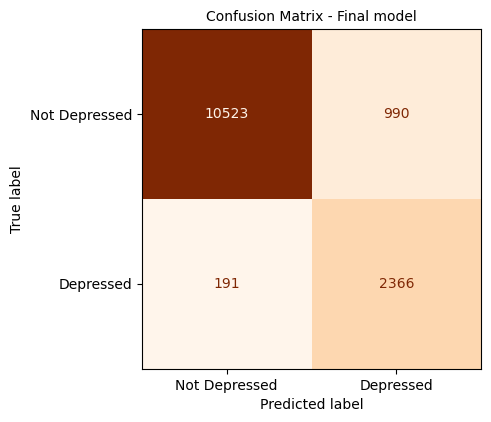

In [197]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Depressed", "Depressed"])
disp.plot(cmap='Oranges', ax=axes, colorbar=False, values_format='.0f')
axes.set_title("Confusion Matrix - Final model", fontsize=10)
plt.tight_layout()
plt.show()

# 7. Predcitions on external data 

## 7.1 Load and prepare external data

In [199]:
external_df = pd.read_csv(test_path, names=columns_names[:-1], header=0) 
external_df.head()

,id,name,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [200]:
# ids is needed for the prediction (later)
ids = external_df['id'].copy()
external_df = external_df.drop(["name", "id"], axis=1)
external_df.head()

,gender,age,city,occupation_status,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


## 7.2 Predict

In [204]:
probs = final_model.predict_proba(external_df)[:, 1]
predictions = (probs >= best_threshold).astype(int)
output = pd.DataFrame({'id': ids, 'Depression': predictions})
output

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [205]:
# predictions_output_path = 'output/external_data_predictions.csv'
# output.to_csv(predictions_output_path, index=False)
# print(f"Predictions saved to {predictions_output_path}")

Predictions saved to output/external_data_predictions.csv


# 8. Deployment 

- organize code into reusable modules & scripts ->>> GITHUB 

# Conclusion and next step
This notebook delivered a comprehensive end-to-end workflow for predicting depression risk using anonymized survey data that captures demographic, academic, occupational, lifestyle, and psychological factors. The process began with detailed data exploration and visualization to understand feature distributions, correlations, and potential data quality issues. Careful preprocessing addressed missing values, high-cardinality features, and logical inconsistencies, while custom feature engineering and imputation strategies ensured both students and working professionals were accurately represented.

Feature selection was performed using a model-based approach to isolate the most predictive variables. Subsequently, both Logistic Regression and Random Forest models were trained and rigorously tuned with GridSearchCV, optimizing not only model hyperparameters but also feature selection thresholds. Model performance was evaluated and the best-performing model was identified for final prediction and deployment.

**Potential next steps for further enhancement include:**
- Implementing deep learning model, such as Multi-Layer Perceptron (MLP)
- Implementing XGBoost model